<a href="https://colab.research.google.com/github/dinshi17/Dementia-Detection/blob/main/Early_prediction_of_Dementia_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dissertation/OASIS3.csv')

# Visualize the dx1 column

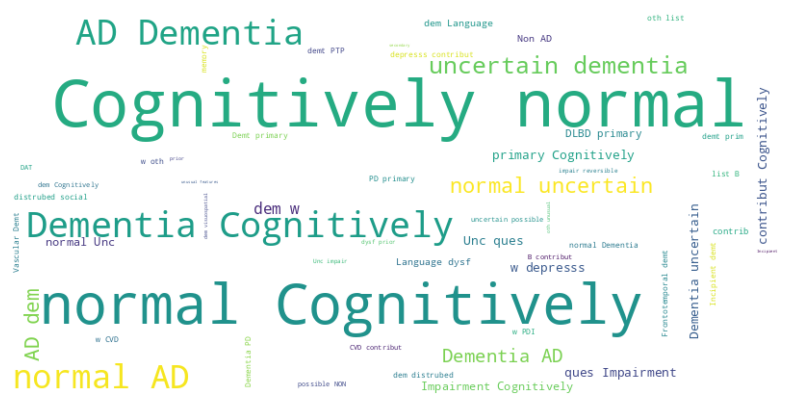

In [ ]:

from wordcloud import WordCloud


# Convert the "dx1" column to strings
df['dx1'] = df['dx1'].astype(str)

# Combine all variations into a single string
text = ' '.join(df['dx1'])

# Create and configure the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Missing Values Visualization

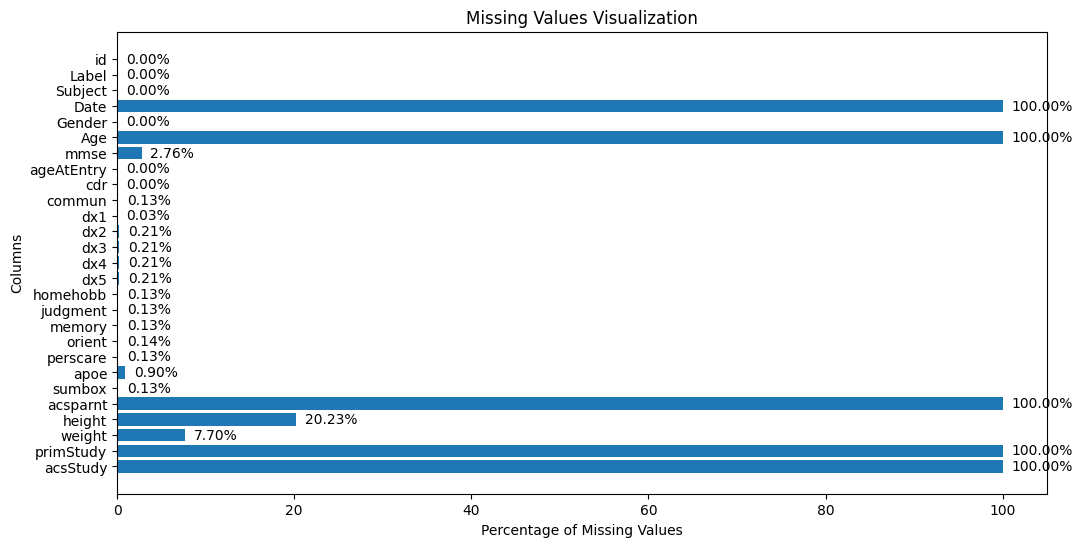

In [ ]:


# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot to visualize missing values with percentage labels
plt.figure(figsize=(12, 6))
bars = plt.barh(missing_percentage.index, missing_percentage)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values Visualization')
plt.gca().invert_yaxis()  # Invert the y-axis to show columns with the most missing values at the top

# Add percentage labels on top of the bars with adjusted positioning
for bar in bars:
    width = bar.get_width()
    label_x = width + 1  # Adjust the x-coordinate for label positioning
    plt.text(label_x, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

plt.show()


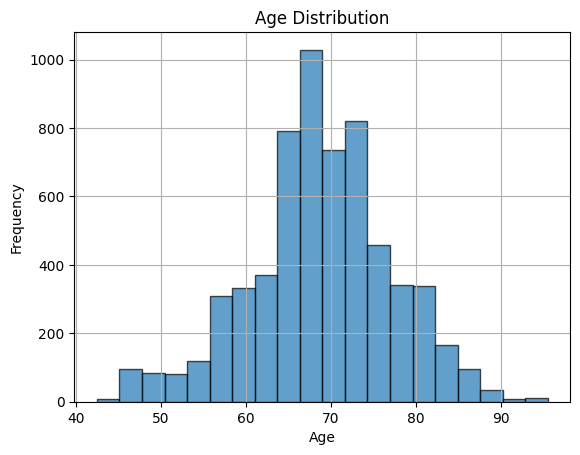

In [ ]:

# Assuming 'df' is your DataFrame and 'Age' is the column containing age data
age_data = df['ageAtEntry']

# Create a histogram
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)

# Show the histogram
plt.show()


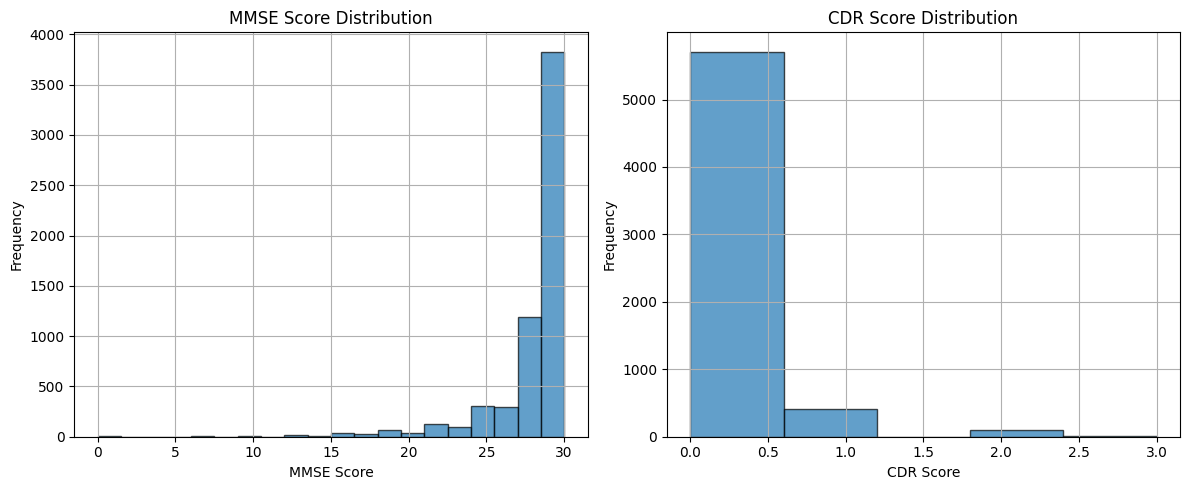

In [ ]:

# MMSE and CDR are columns containing MMSE and CDR scores
mmse_scores = df['mmse']
cdr_scores = df['cdr']

# Create subplots for MMSE and CDR scores
plt.figure(figsize=(12, 5))

# Create a histogram for MMSE scores
plt.subplot(1, 2, 1)
plt.hist(mmse_scores, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.title('MMSE Score Distribution')
plt.grid(True)

# Create a histogram for CDR scores
plt.subplot(1, 2, 2)
plt.hist(cdr_scores, bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('CDR Score')
plt.ylabel('Frequency')
plt.title('CDR Score Distribution')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:

# Replace 'mmse_column_name' with the actual column name in your DataFrame
mmse_counts = df['mmse'].value_counts()

# Print the result
print(mmse_counts)


30.0    2340
29.0    1489
28.0     749
27.0     441
26.0     295
25.0     181
24.0     120
23.0      93
22.0      69
21.0      62
19.0      39
20.0      37
17.0      24
18.0      24
16.0      22
15.0      14
12.0      12
14.0       9
13.0       8
10.0       6
9.0        4
6.0        3
7.0        3
4.0        2
11.0       2
0.0        2
1.0        1
2.0        1
Name: mmse, dtype: int64


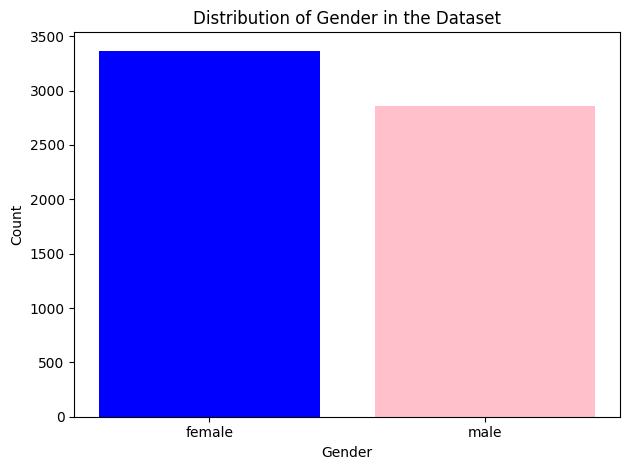

In [ ]:

# Count the frequency of each gender category
gender_counts = df['Gender'].value_counts()

# Extract category labels and corresponding counts
categories = gender_counts.index
counts = gender_counts.values

# Create the bar chart
plt.bar(categories, counts, color=['blue', 'pink'])  # You can customize the colors if needed

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')

plt.tight_layout()
plt.show()


# **Pre-Processing** - Exploring the dataset

In [ ]:
df.tail()

,id,Label,Subject,Date,Gender,Age,mmse,ageAtEntry,cdr,commun,...,memory,orient,perscare,apoe,sumbox,acsparnt,height,weight,primStudy,acsStudy
6219,/@WEBAPP/images/r.gif,OAS30106_ClinicalData_d5979,OAS30106,NaN,female,NaN,30.0,60.361397,0.0,0.0,...,0.0,0.0,0.0,44.0,0.0,NaN,64.0,136.0,NaN,NaN
6220,/@WEBAPP/images/r.gif,OAS30189_ClinicalData_d0771,OAS30189,NaN,female,NaN,29.0,68.071180,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,NaN,NaN,NaN,NaN,NaN
6221,/@WEBAPP/images/r.gif,OAS30005_ClinicalData_d1192,OAS30005,NaN,female,NaN,28.0,48.030117,0.0,0.0,...,0.0,0.0,0.0,33.0,0.0,NaN,62.0,174.0,NaN,NaN
6222,/@WEBAPP/images/r.gif,OAS30103_ClinicalData_d6723,OAS30103,NaN,female,NaN,30.0,56.503765,0.0,0.0,...,0.0,0.0,0.0,34.0,0.0,NaN,66.0,174.0,NaN,NaN
6223,/@WEBAPP/images/r.gif,OAS31044_ClinicalData_d1124,OAS31044,NaN,male,NaN,29.0,75.950720,1.0,1.0,...,1.0,0.5,1.0,33.0,6.5,NaN,69.0,161.0,NaN,NaN


### Size of the dataset

In [ ]:
df.shape

(6224, 27)

### Checking for datatypes

In [ ]:
df.dtypes

id             object
Label          object
Subject        object
Date          float64
Gender         object
Age           float64
mmse          float64
ageAtEntry    float64
cdr           float64
commun        float64
dx1            object
dx2            object
dx3            object
dx4            object
dx5            object
homehobb      float64
judgment      float64
memory        float64
orient        float64
perscare      float64
apoe          float64
sumbox        float64
acsparnt      float64
height        float64
weight        float64
primStudy     float64
acsStudy      float64
dtype: object

## dx1 is taken as the Target variable. It contains different types of Dementia

50 distinct values

In [ ]:
distinct_values =df['dx1'].nunique()
distinct_values

50

In [ ]:
GroupNmaes=df.dx1.unique()
print(GroupNmaes)


['AD Dementia' 'Frontotemporal demt. prim' 'Cognitively normal'
 'DLBD- primary' 'uncertain dementia' 'AD dem distrubed social- prior'
 'Unc: ques. Impairment' 'AD dem/FLD prior to AD dem'
 'AD dem w/depresss- not contribut' 'Non AD dem- Other primary' '.'
 'AD dem w/depresss- contribut' 'AD dem w/PDI after AD dem not contrib'
 'uncertain- possible NON AD dem' 'AD dem Language dysf after'
 'Incipient demt PTP' 'No dementia' 'AD dem distrubed social- with' 'DAT'
 'Dementia/PD- primary' 'AD dem w/oth (list B) not contrib'
 'AD dem w/CVD not contrib' 'AD dem Language dysf prior'
 'AD dem w/oth (list B) contribut' 'Vascular Demt- primary'
 '0.5 in memory only' 'AD dem Language dysf with' 'AD dem w/CVD contribut'
 'Incipient Non-AD dem' 'DLBD, primary'
 'AD dem w/PDI after AD dem contribut' 'ProAph w/o dement'
 'Vascular Demt- secondary' 'AD dem w/oth unusual features/demt on'
 'AD dem w/depresss, not contribut' 'AD dem cannot be primary'
 'AD dem w/oth unusual feat/subs demt' 'Unc: impair 

## Counts of each unique value in the dx1 column

In [ ]:
value_counts = df['dx1'].value_counts()

print("Counts of each unique value in the column:")
print(value_counts)

Counts of each unique value in the column:
Cognitively normal                       4476
AD Dementia                               846
uncertain dementia                        366
Unc: ques. Impairment                      79
AD dem w/depresss- not contribut           45
DLBD- primary                              43
.                                          43
Incipient demt PTP                         23
AD dem w/depresss- contribut               23
Frontotemporal demt. prim                  20
Non AD dem- Other primary                  18
Dementia/PD- primary                       18
Vascular Demt- primary                     17
No dementia                                17
0.5 in memory only                         16
AD dem Language dysf after                 14
AD dem Language dysf with                  14
AD dem w/CVD not contrib                   13
AD dem w/CVD contribut                     12
AD dem w/PDI after AD dem not contrib      11
AD dem w/oth (list B) contribut      

## Renaming the **specific variations** in the 'dx1' column

In [ ]:
df['dx1'] = df['dx1'].str.replace('AD dem w/depresss, not contribut', 'AD dem w/depresss- not contribut')
df['dx1'] = df['dx1'].str.replace('AD dem w/depresss  not contribut', 'AD dem w/depresss- not contribut')
df['dx1'] = df['dx1'].str.replace('AD dem w/depresss not contribut','AD dem w/depresss- not contribut')

df['dx1'] = df['dx1'].str.replace('uncertain  possible NON AD dem', 'uncertain- possible NON AD dem')
df['dx1'] = df['dx1'].str.replace('Vascular Demt  primary', 'Vascular Demt- primary')

df['dx1'] = df['dx1'].str.replace('AD dem w/depresss  contribut', 'AD dem w/depresss- contribut')

df['dx1'] = df['dx1'].str.replace('DLBD, primary', 'DLBD- primary')

## reduced distinct values..

In [ ]:
distinct_values =df['dx1'].nunique()
distinct_values

44

In [ ]:
value_counts = df['dx1'].value_counts()

print("Counts of each unique value in the column:")
print(value_counts)

Counts of each unique value in the column:
Cognitively normal                       4476
AD Dementia                               846
uncertain dementia                        366
Unc: ques. Impairment                      79
AD dem w/depresss- not contribut           49
DLBD- primary                              45
.                                          43
AD dem w/depresss- contribut               24
Incipient demt PTP                         23
Frontotemporal demt. prim                  20
Non AD dem- Other primary                  18
Dementia/PD- primary                       18
Vascular Demt- primary                     18
No dementia                                17
0.5 in memory only                         16
AD dem Language dysf with                  14
AD dem Language dysf after                 14
AD dem w/CVD not contrib                   13
AD dem w/CVD contribut                     12
AD dem w/oth (list B) contribut            11
AD dem w/PDI after AD dem not contrib

## Removing the "."

In [ ]:
df = df[df['dx1'] != '.']

In [ ]:
value_counts = df['dx1'].value_counts()

print("Counts of each unique value in the column:")
print(value_counts)

Counts of each unique value in the column:
Cognitively normal                       4476
AD Dementia                               846
uncertain dementia                        366
Unc: ques. Impairment                      79
AD dem w/depresss- not contribut           49
DLBD- primary                              45
AD dem w/depresss- contribut               24
Incipient demt PTP                         23
Frontotemporal demt. prim                  20
Non AD dem- Other primary                  18
Dementia/PD- primary                       18
Vascular Demt- primary                     18
No dementia                                17
0.5 in memory only                         16
AD dem Language dysf with                  14
AD dem Language dysf after                 14
AD dem w/CVD not contrib                   13
AD dem w/CVD contribut                     12
AD dem w/oth (list B) contribut            11
uncertain- possible NON AD dem             11
AD dem w/PDI after AD dem not contrib

## Exploring the null values in the dataset

In [ ]:
df.isna().sum()

id               0
Label            0
Subject          0
Date          6181
Gender           0
Age           6181
mmse           129
ageAtEntry       0
cdr              0
commun           3
dx1              2
dx2             13
dx3             13
dx4             13
dx5             13
homehobb         3
judgment         3
memory           3
orient           4
perscare         3
apoe            56
sumbox           3
acsparnt      6181
height        1216
weight         436
primStudy     6181
acsStudy      6181
dtype: int64

### Removing 2 null records of dx1 as  other test results associated to this record also not available

In [ ]:
# Drop rows with null values in the 'dx1' column
df.dropna(subset=['dx1'], inplace=True)

In [ ]:
df.isna().sum()

id               0
Label            0
Subject          0
Date          6179
Gender           0
Age           6179
mmse           127
ageAtEntry       0
cdr              0
commun           1
dx1              0
dx2             11
dx3             11
dx4             11
dx5             11
homehobb         1
judgment         1
memory           1
orient           2
perscare         1
apoe            54
sumbox           1
acsparnt      6179
height        1216
weight         436
primStudy     6179
acsStudy      6179
dtype: int64

## Null value percentage of each column

In [ ]:
df.isna().sum()/len(df)*100

id              0.000000
Label           0.000000
Subject         0.000000
Date          100.000000
Gender          0.000000
Age           100.000000
mmse            2.055349
ageAtEntry      0.000000
cdr             0.000000
commun          0.016184
dx1             0.000000
dx2             0.178022
dx3             0.178022
dx4             0.178022
dx5             0.178022
homehobb        0.016184
judgment        0.016184
memory          0.016184
orient          0.032368
perscare        0.016184
apoe            0.873928
sumbox          0.016184
acsparnt      100.000000
height         19.679560
weight          7.056158
primStudy     100.000000
acsStudy      100.000000
dtype: float64

In [ ]:
df.describe()

,Date,Age,mmse,ageAtEntry,cdr,commun,homehobb,judgment,memory,orient,perscare,apoe,sumbox,acsparnt,height,weight,primStudy,acsStudy
count,0.0,0.0,6052.000000,6179.000000,6179.000000,6178.000000,6178.000000,6178.000000,6178.000000,6177.000000,6178.000000,6125.000000,6178.000000,0.0,4963.000000,5743.000000,0.0,0.0
mean,NaN,NaN,28.043457,68.803361,0.196957,0.147782,0.169391,0.193024,0.216251,0.157925,0.075429,32.246531,0.957349,NaN,65.810558,168.607348,NaN,NaN
std,NaN,NaN,3.088556,8.387196,0.390442,0.393729,0.429125,0.421144,0.436624,0.398689,0.319196,4.585848,2.190684,NaN,3.835102,36.180080,NaN,NaN
min,NaN,NaN,0.000000,42.469540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,NaN,51.000000,67.000000,NaN,NaN
25%,NaN,NaN,28.000000,64.416150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,NaN,63.000000,143.000000,NaN,NaN
50%,NaN,NaN,29.000000,68.736480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,NaN,66.000000,166.000000,NaN,NaN
75%,NaN,NaN,30.000000,74.015060,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,34.000000,0.500000,NaN,69.000000,190.000000,NaN,NaN
max,NaN,NaN,30.000000,95.567420,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,44.000000,18.000000,NaN,79.000000,326.000000,NaN,NaN


In [ ]:
df.isna().sum()

id               0
Label            0
Subject          0
Date          6179
Gender           0
Age           6179
mmse           127
ageAtEntry       0
cdr              0
commun           1
dx1              0
dx2             11
dx3             11
dx4             11
dx5             11
homehobb         1
judgment         1
memory           1
orient           2
perscare         1
apoe            54
sumbox           1
acsparnt      6179
height        1216
weight         436
primStudy     6179
acsStudy      6179
dtype: int64

## Drop the columns with high missing values from the DataFrame

In [ ]:
df=df.drop(columns=['id', 'Label','Date', 'Age', 'dx2', 'dx3', 'dx4', 'dx5','acsparnt','primStudy','acsStudy'])

## Calculate the percentage of missing values in  remaining each columns

In [ ]:
df.isna().sum()/len(df)*100

Subject        0.000000
Gender         0.000000
mmse           2.055349
ageAtEntry     0.000000
cdr            0.000000
commun         0.016184
dx1            0.000000
homehobb       0.016184
judgment       0.016184
memory         0.016184
orient         0.032368
perscare       0.016184
apoe           0.873928
sumbox         0.016184
height        19.679560
weight         7.056158
dtype: float64

In [ ]:
df.dtypes

Subject        object
Gender         object
mmse          float64
ageAtEntry    float64
cdr           float64
commun        float64
dx1            object
homehobb      float64
judgment      float64
memory        float64
orient        float64
perscare      float64
apoe          float64
sumbox        float64
height        float64
weight        float64
dtype: object

CDR Clinical Dementia Rating- Mode
0 = Normal

0.5 = Very Mild Dementia

1 = Mild Dementia

2 = Moderate Dementia

3 = Severe Dementia

MMSE - Mini-Mental State Exam Scoring Chart
Score	Level of Dementia - **Mean**

24 and higher	Normal cognition; no dementia

19 – 23	Mild dementia

10 – 18	Moderate dementia

9 and lower	Severe dementia

apoe - **Mode**

commun           **Mode**

homehobb         **Mode**

judgment         **Mode**

memory           Mode

orient           Mode

perscare         Mode

sumbox           Mode

## mmse coulmn: Group the Data by Dementia Type (dx1) and applied Mean imputation

In [ ]:

# Step 1: Group the Data by Dementia Type (dx1)
grouped = df.groupby('dx1')

# Step 2: Fill Missing Values for 'mmse' using Mean Imputation within Each Group
for name, group in grouped:
    # Calculate the mean of 'mmse' within the current group
    mean_mmse = group['mmse'].mean()

    # Fill missing values in 'mmse' column with the calculated mean
    group['mmse'].fillna(mean_mmse, inplace=True)

    # Update the original DataFrame with the imputed values for this group
    df.update(group)

# Step 3: Recombine the Data
# At this point, all missing values for 'mmse' within each group have been imputed

# Now df contains the complete dataset with 'mmse' column filled using mean imputation


In [ ]:
df.isna().sum()

Subject          0
Gender           0
mmse             1
ageAtEntry       0
cdr              0
commun           1
dx1              0
homehobb         1
judgment         1
memory           1
orient           2
perscare         1
apoe            54
sumbox           1
height        1216
weight         436
dtype: int64

# 'commun', 'homehobb', 'judgment', 'memory', 'orient', 'perscare', 'sumbox','apoe'

## Group the Data by Dementia Type (dx1) and applied Mode Imputation

In [ ]:

# Step 1: Group the Data by Dementia Type (dx1)
grouped = df.groupby('dx1')

# Step 2: Fill Missing Values for the Columns using Mode Imputation within Each Group
for name, group in grouped:
    # Calculate the mode for each column in the current group
    mode_values = group[['commun', 'homehobb', 'judgment', 'memory', 'orient', 'perscare', 'sumbox','apoe']].mode().iloc[0]

    # Fill missing values in each column with the respective mode value
    group[['commun', 'homehobb', 'judgment', 'memory', 'orient', 'perscare', 'sumbox','apoe']] = group[['commun', 'homehobb', 'judgment', 'memory', 'orient', 'perscare', 'sumbox','apoe']].fillna(mode_values)

    # Update the original DataFrame with the imputed values for this group
    df.update(group)

# Step 3: Recombine the Data
# At this point, all missing values for the specified columns within each group have been imputed

# Now df contains the complete dataset with the specified columns filled using mode imputation


In [ ]:
df.isna().sum()

Subject          0
Gender           0
mmse             1
ageAtEntry       0
cdr              0
commun           0
dx1              0
homehobb         0
judgment         0
memory           0
orient           0
perscare         0
apoe             1
sumbox           0
height        1216
weight         436
dtype: int64

## Examine the column: apoe and mmse:

dx1="AD dem visuospatial, after"

In [ ]:
# View the records with null values in the 'apoe' column
null_apoe_records = df[df['apoe'].isnull()]

print(null_apoe_records)

       Subject Gender  mmse  ageAtEntry  cdr  commun  \
2544  OAS30826   male  23.0        59.0  0.5     0.0   

                             dx1  homehobb  judgment  memory  orient  \
2544  AD dem visuospatial, after       0.0       0.5     0.5     0.0   

      perscare  apoe  sumbox  height  weight  
2544       0.0   NaN     1.0    70.0     NaN  


dx1="AD dem w/oth unusual features"

In [ ]:
# View the records with null values in the 'mmse' column
null_apoe_records = df[df['mmse'].isnull()]

print(null_apoe_records)

       Subject Gender  mmse  ageAtEntry  cdr  commun  \
2783  OAS30375   male   NaN    50.42026  0.5     0.0   

                                dx1  homehobb  judgment  memory  orient  \
2783  AD dem w/oth unusual features       0.0       0.0     0.5     0.0   

      perscare  apoe  sumbox  height  weight  
2783       0.0  33.0     0.5     NaN   228.0  


## AD dem visuospatial, after and  AD dem w/oth unusual features have only 1 record , So decided to remove those reords

In [ ]:
value_counts = df['dx1'].value_counts()
value_counts

Cognitively normal                       4476
AD Dementia                               846
uncertain dementia                        366
Unc: ques. Impairment                      79
AD dem w/depresss- not contribut           49
DLBD- primary                              45
AD dem w/depresss- contribut               24
Incipient demt PTP                         23
Frontotemporal demt. prim                  20
Non AD dem- Other primary                  18
Dementia/PD- primary                       18
Vascular Demt- primary                     18
No dementia                                17
0.5 in memory only                         16
AD dem Language dysf with                  14
AD dem Language dysf after                 14
AD dem w/CVD not contrib                   13
AD dem w/CVD contribut                     12
AD dem w/oth (list B) contribut            11
uncertain- possible NON AD dem             11
AD dem w/PDI after AD dem not contrib      11
DAT                               

In [ ]:
# Step 1: Create a list of records to remove
records_to_remove = ['AD dem visuospatial, after', 'AD dem w/oth unusual features']

# Step 2: Filter the DataFrame to keep only the records that do not have the specified values in the 'dx1' column
df = df[~df['dx1'].isin(records_to_remove)]

# Now df contains the dataset with the specified records removed from the 'dx1' column


In [ ]:
value_counts = df['dx1'].value_counts()
value_counts

Cognitively normal                       4476
AD Dementia                               846
uncertain dementia                        366
Unc: ques. Impairment                      79
AD dem w/depresss- not contribut           49
DLBD- primary                              45
AD dem w/depresss- contribut               24
Incipient demt PTP                         23
Frontotemporal demt. prim                  20
Dementia/PD- primary                       18
Non AD dem- Other primary                  18
Vascular Demt- primary                     18
No dementia                                17
0.5 in memory only                         16
AD dem Language dysf with                  14
AD dem Language dysf after                 14
AD dem w/CVD not contrib                   13
AD dem w/CVD contribut                     12
uncertain- possible NON AD dem             11
AD dem w/oth (list B) contribut            11
AD dem w/PDI after AD dem not contrib      11
DAT                               

In [ ]:
df.isna().sum()

Subject          0
Gender           0
mmse             0
ageAtEntry       0
cdr              0
commun           0
dx1              0
homehobb         0
judgment         0
memory           0
orient           0
perscare         0
apoe             0
sumbox           0
height        1215
weight         435
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

Subject        0.000000
Gender         0.000000
mmse           0.000000
ageAtEntry     0.000000
cdr            0.000000
commun         0.000000
dx1            0.000000
homehobb       0.000000
judgment       0.000000
memory         0.000000
orient         0.000000
perscare       0.000000
apoe           0.000000
sumbox         0.000000
height        19.669743
weight         7.042254
dtype: float64

## Checking for normal distribution : height and weight

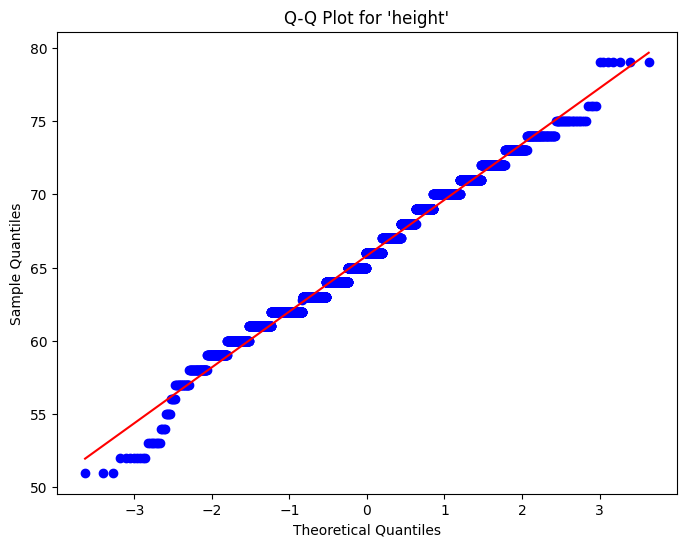

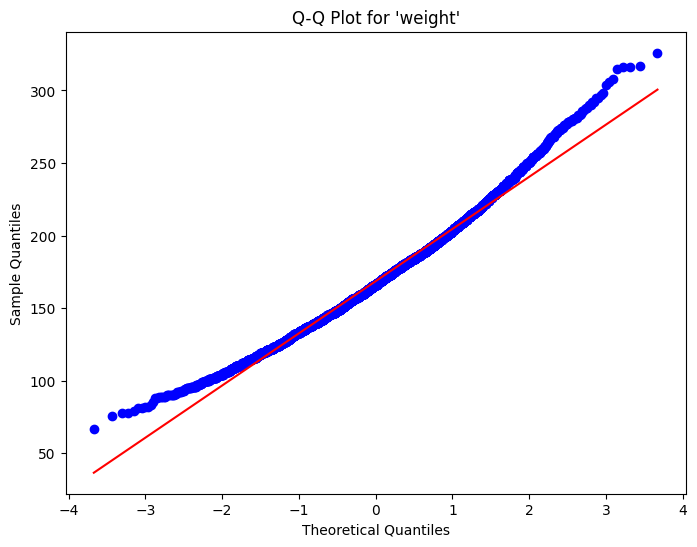

In [ ]:

# Select only the non-null values from 'height' and 'weight' columns
height_data = df['height'].dropna()
weight_data = df['weight'].dropna()

# Create Q-Q plot for 'height'
plt.figure(figsize=(8, 6))
stats.probplot(height_data, dist='norm', plot=plt)
plt.title("Q-Q Plot for 'height'")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Create Q-Q plot for 'weight'
plt.figure(figsize=(8, 6))
stats.probplot(weight_data, dist='norm', plot=plt)
plt.title("Q-Q Plot for 'weight'")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


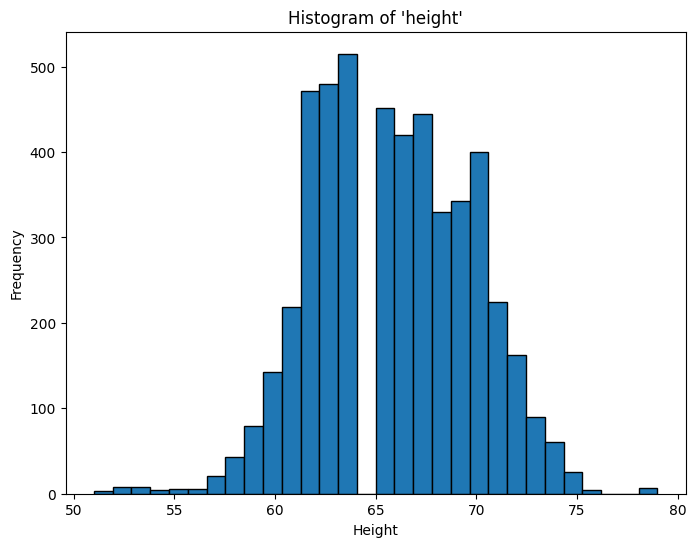

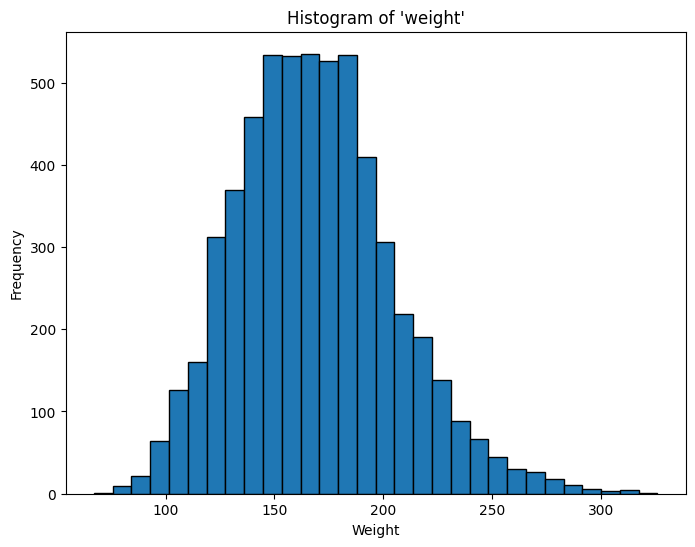

In [ ]:

# Plot histogram for 'height'
plt.figure(figsize=(8, 6))
plt.hist(df['height'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of 'height'")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for 'weight'
plt.figure(figsize=(8, 6))
plt.hist(df['weight'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of 'weight'")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from scipy.stats import shapiro, anderson

# Perform Shapiro-Wilk test for 'height'
height_data = df['height'].dropna()
stat_height, p_height = shapiro(height_data)
print("Shapiro-Wilk test for 'height':")
print("Test Statistic =", stat_height)
print("p-value =", p_height)
if p_height > 0.05:
    print("The data for 'height' is normally distributed.")
else:
    print("The data for 'height' is not normally distributed.")

# Perform Shapiro-Wilk test for 'weight'
weight_data = df['weight'].dropna()
stat_weight, p_weight = shapiro(weight_data)
print("\nShapiro-Wilk test for 'weight':")
print("Test Statistic =", stat_weight)
print("p-value =", p_weight)
if p_weight > 0.05:
    print("The data for 'weight' is normally distributed.")
else:
    print("The data for 'weight' is not normally distributed.")

# Perform Anderson-Darling test for 'height'
result_height = anderson(height_data)
print("\nAnderson-Darling test for 'height':")
print("Statistic =", result_height.statistic)
print("Critical Values =", result_height.critical_values)
print("Significance Levels =", result_height.significance_level)

# Perform Anderson-Darling test for 'weight'
result_weight = anderson(weight_data)
print("\nAnderson-Darling test for 'weight':")
print("Statistic =", result_weight.statistic)
print("Critical Values =", result_weight.critical_values)
print("Significance Levels =", result_weight.significance_level)


Shapiro-Wilk test for 'height':
Test Statistic = 0.9865345358848572
p-value = 2.3047606583975e-21
The data for 'height' is not normally distributed.

Shapiro-Wilk test for 'weight':
Test Statistic = 0.9866282343864441
p-value = 6.635256748575388e-23
The data for 'weight' is not normally distributed.

Anderson-Darling test for 'height':
Statistic = 26.0199671727205
Critical Values = [0.576 0.655 0.786 0.917 1.091]
Significance Levels = [15.  10.   5.   2.5  1. ]

Anderson-Darling test for 'weight':
Statistic = 13.775702647036269
Critical Values = [0.576 0.656 0.786 0.917 1.091]
Significance Levels = [15.  10.   5.   2.5  1. ]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Decided to use median imputation as itis not normaly distributed

In [ ]:
# Median imputation for 'height'
median_height = df['height'].median()
df['height'].fillna(median_height, inplace=True)

# Median imputation for 'weight'
median_weight = df['weight'].median()
df['weight'].fillna(median_weight, inplace=True)

# Confirm that missing values have been imputed
print(df.isnull().sum())


Subject       0
Gender        0
mmse          0
ageAtEntry    0
cdr           0
commun        0
dx1           0
homehobb      0
judgment      0
memory        0
orient        0
perscare      0
apoe          0
sumbox        0
height        0
weight        0
dtype: int64


<ipython-input-13-6027611900e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'].fillna(median_height, inplace=True)
<ipython-input-13-6027611900e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'].fillna(median_weight, inplace=True)


In [ ]:
pip install scipy


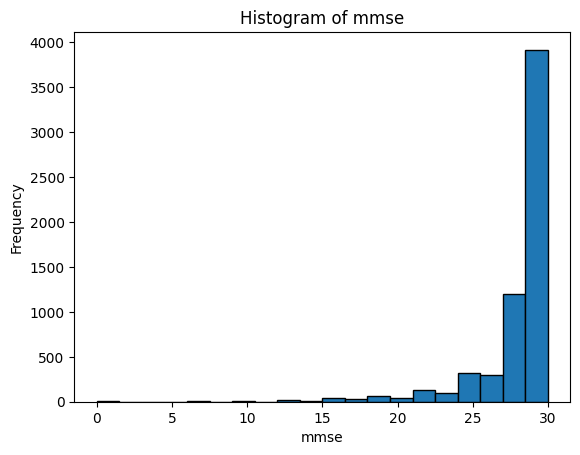

Mean: 28.039969118910737
Median: 29.0
Standard Deviation: 3.0756219048396516
Shapiro-Wilk Test (p-value): 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt


# Check the histogram
plt.hist(df['mmse'], bins=20, edgecolor='k')
plt.title('Histogram of mmse')
plt.xlabel('mmse')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics
mean_mmse = df['mmse'].mean()
median_mmse = df['mmse'].median()
std_mmse = df['mmse'].std()

print("Mean:", mean_mmse)
print("Median:", median_mmse)
print("Standard Deviation:", std_mmse)

# Perform Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = shapiro(df['mmse'])
print("Shapiro-Wilk Test (p-value):", shapiro_p_value)


 the p-value is very small (close to zero), which suggests that the 'mmse' column is not normally distributed.

## Normalizing MMSE column

The MMSE is a cognitive test score that measures cognitive impairment, with scores ranging from 0 to 30.

In [ ]:

# Calculate the minimum and maximum values of MMSE
min_mmse = df['mmse'].min()
max_mmse = df['mmse'].max()

# Normalize MMSE using Min-Max scaling
df['normalized_mmse'] = (df['mmse'] - min_mmse) / (max_mmse - min_mmse)

# Drop the original 'mmse' column if you no longer need it in the analysis
df.drop('mmse', axis=1, inplace=True)


<ipython-input-14-e5917f936d16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_mmse'] = (df['mmse'] - min_mmse) / (max_mmse - min_mmse)
<ipython-input-14-e5917f936d16>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('mmse', axis=1, inplace=True)


## Normalizing 'height', 'weight', 'ageAtEntry'columns

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns for normalization
columns_to_normalize = ['height', 'weight', 'ageAtEntry']

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print the first few rows of the DataFrame to verify the changes
print(df.head())


    Subject  Gender  ageAtEntry  cdr  commun                        dx1  \
0  OAS30124  female    0.690729  1.0     1.0                AD Dementia   
1  OAS30354    male    0.455244  2.0     2.0  Frontotemporal demt. prim   
2  OAS31129  female    0.482263  1.0     1.0                AD Dementia   
3  OAS30813  female    0.528926  0.0     0.0         Cognitively normal   
4  OAS30184  female    0.576415  0.0     0.0         Cognitively normal   

   homehobb  judgment  memory  orient  perscare  apoe  sumbox    height  \
0       1.0       1.0     1.0     1.0       0.0  34.0     5.0  0.392857   
1       2.0       1.0     0.5     0.5       2.0  33.0     8.0  0.571429   
2       1.0       1.0     1.0     1.0       0.0  34.0     5.0  0.428571   
3       0.0       0.5     0.0     0.0       0.0  33.0     0.5  0.500000   
4       0.0       0.0     0.0     0.0       0.0  33.0     0.0  0.607143   

     weight  normalized_mmse  
0  0.239382         0.533333  
1  0.440154         0.966667  
2  0.

<ipython-input-15-1807406a8427>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


## Endoding Gender column with Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for 'Gender': only two cetegories
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Print the first few rows of the DataFrame with encoded columns
print(df.head())

    Subject  Gender  ageAtEntry  cdr  commun                        dx1  \
0  OAS30124       0    0.690729  1.0     1.0                AD Dementia   
1  OAS30354       1    0.455244  2.0     2.0  Frontotemporal demt. prim   
2  OAS31129       0    0.482263  1.0     1.0                AD Dementia   
3  OAS30813       0    0.528926  0.0     0.0         Cognitively normal   
4  OAS30184       0    0.576415  0.0     0.0         Cognitively normal   

   homehobb  judgment  memory  orient  perscare  apoe  sumbox    height  \
0       1.0       1.0     1.0     1.0       0.0  34.0     5.0  0.392857   
1       2.0       1.0     0.5     0.5       2.0  33.0     8.0  0.571429   
2       1.0       1.0     1.0     1.0       0.0  34.0     5.0  0.428571   
3       0.0       0.5     0.0     0.0       0.0  33.0     0.5  0.500000   
4       0.0       0.0     0.0     0.0       0.0  33.0     0.0  0.607143   

     weight  normalized_mmse  
0  0.239382         0.533333  
1  0.440154         0.966667  
2  0.

<ipython-input-16-5795a85f4fc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [ ]:
df.head()

,Subject,Gender,ageAtEntry,cdr,commun,dx1,homehobb,judgment,memory,orient,perscare,apoe,sumbox,height,weight,normalized_mmse,Dementia_Status
0,OAS30124,0,0.690729,1.0,1.0,AD Dementia,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.392857,0.239382,0.533333,Demented
1,OAS30354,1,0.455244,2.0,2.0,Frontotemporal demt. prim,2.0,1.0,0.5,0.5,2.0,33.0,8.0,0.571429,0.440154,0.966667,Demented
2,OAS31129,0,0.482263,1.0,1.0,AD Dementia,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.428571,0.200772,0.666667,Demented
3,OAS30813,0,0.528926,0.0,0.0,Cognitively normal,0.0,0.5,0.0,0.0,0.0,33.0,0.5,0.500000,0.343629,1.000000,Non-Demented
4,OAS30184,0,0.576415,0.0,0.0,Cognitively normal,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.607143,0.436293,1.000000,Non-Demented


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Gender'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['ageAtEntry'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['cdr'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['commun'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Gender'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['ageAtEntry'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['cdr'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['commun'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['Subject'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['dx1'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_10, *['Dementia_Status'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_11, *[[['Gender', 'ageAtEntry'], ['ageAtEntry', 'cdr'], ['cdr', 'commun'], ['commun', 'homehobb']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_12, *['Subject', 'dx1'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_13, *['dx1', 'Dementia_Status'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['Gender', 'Subject'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['Gender', 'dx1'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['Gender', 'Dementia_Status'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_17, *['ageAtEntry', 'Subject'], **{'inner': 'stick'})
chart

# DX1 Conversion

In [ ]:
# Handle NaN values in the 'dx1' column by replacing them with an empty string ''
df['dx1'].fillna('', inplace=True)

# Custom mapping function to categorize dementia types
def categorize_dementia(dx):
    non_demented_keywords = ['Cognitively normal', 'Unc:ques. Impairment', 'ProAph w/o dement', 'No dementia', 'Unc: impair reversible', 'uncertain- possible NON AD dem']
    for keyword in non_demented_keywords:
        if keyword in dx:
            return 'Non-Demented'
    return 'Demented'

# Apply the mapping function to the 'dx1' column and create a new column 'Dementia Status'
df['Dementia_Status'] = df['dx1'].apply(categorize_dementia)

# Display the DataFrame with the new column
print(df)

       Subject  Gender  ageAtEntry  cdr  commun                        dx1  \
0     OAS30124       0    0.690729  1.0     1.0                AD Dementia   
1     OAS30354       1    0.455244  2.0     2.0  Frontotemporal demt. prim   
2     OAS31129       0    0.482263  1.0     1.0                AD Dementia   
3     OAS30813       0    0.528926  0.0     0.0         Cognitively normal   
4     OAS30184       0    0.576415  0.0     0.0         Cognitively normal   
...        ...     ...         ...  ...     ...                        ...   
6219  OAS30106       0    0.336960  0.0     0.0         Cognitively normal   
6220  OAS30189       0    0.482159  0.0     0.0         Cognitively normal   
6221  OAS30005       0    0.104723  0.0     0.0         Cognitively normal   
6222  OAS30103       0    0.264309  0.0     0.0         Cognitively normal   
6223  OAS31044       1    0.630556  1.0     1.0                AD Dementia   

      homehobb  judgment  memory  orient  perscare  apoe  sumbo

<ipython-input-17-a8459daf31d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dx1'].fillna('', inplace=True)
<ipython-input-17-a8459daf31d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dementia_Status'] = df['dx1'].apply(categorize_dementia)


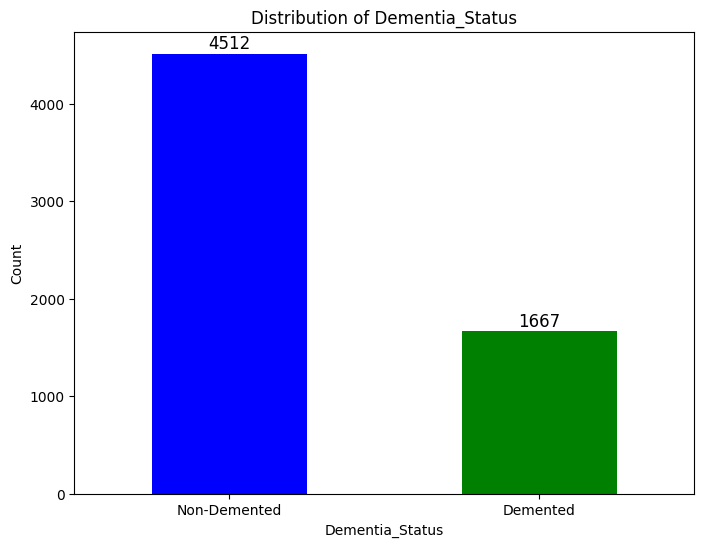

In [ ]:

category_counts = df['Dementia_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = category_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Dementia_Status')
plt.ylabel('Count')
plt.title('Distribution of Dementia_Status')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add counts on top of the bars
for i, count in enumerate(category_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
df['Dementia_Status'].value_counts()

Non-Demented    4512
Demented        1665
Name: Dementia_Status, dtype: int64

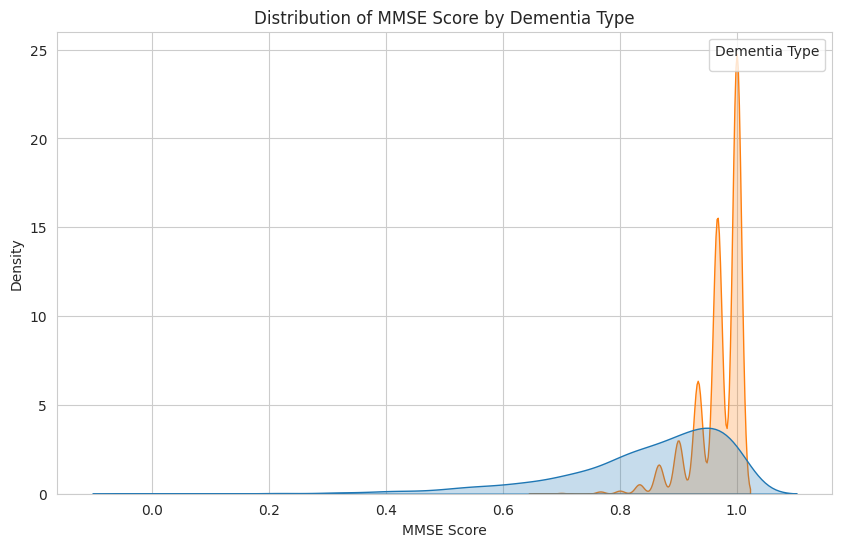

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(data=df, x='normalized_mmse', hue='Dementia_Status', fill=True, common_norm=False)

plt.title('Distribution of MMSE Score by Dementia Type')
plt.xlabel('MMSE Score')
plt.ylabel('Density')
plt.legend(title='Dementia Type')
plt.show()


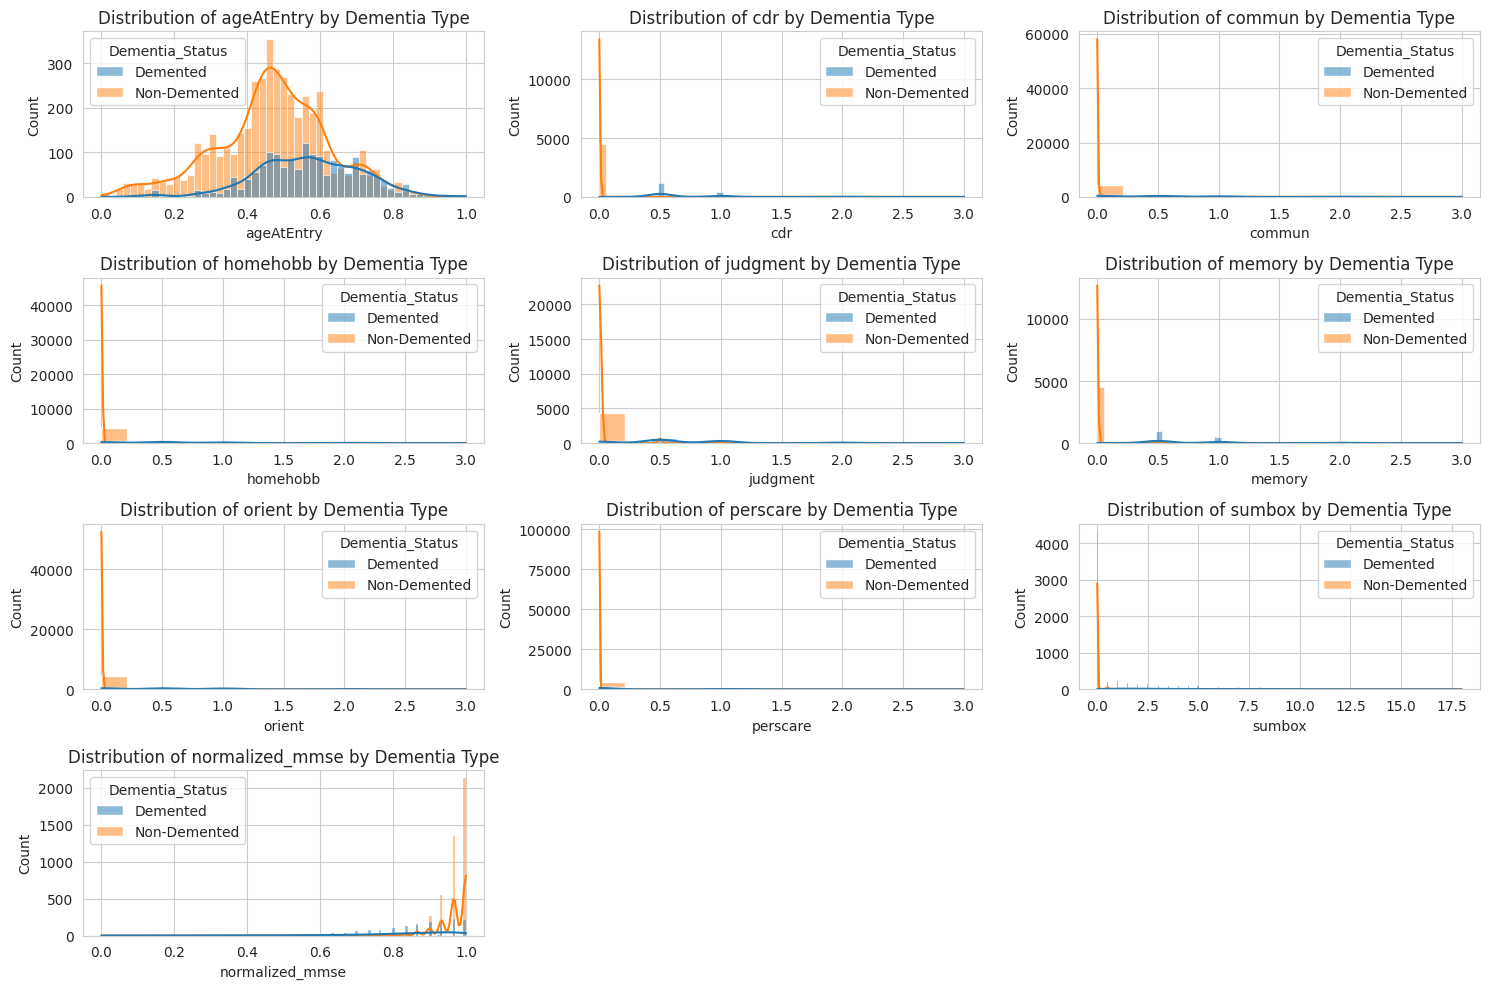

In [ ]:



# List of selected features
selected_features = ['ageAtEntry', 'cdr', 'commun', 'homehobb', 'judgment', 'memory',
       'orient', 'perscare', 'sumbox', 'normalized_mmse', ]

# Create subplots for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns of plots
    sns.histplot(data=df, x=feature, hue='Dementia_Status', kde=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Dementia Type')

plt.tight_layout()
plt.show()


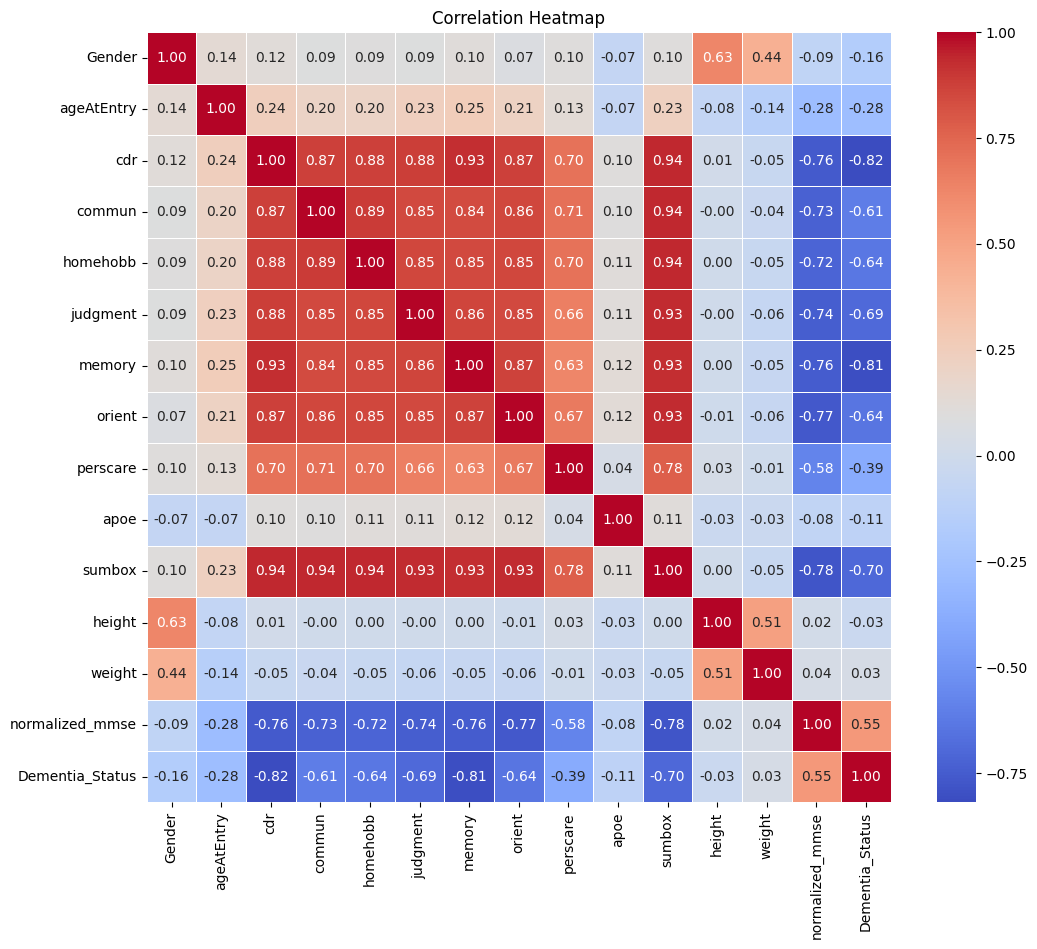

In [ ]:



# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


<Figure size 800x600 with 0 Axes>

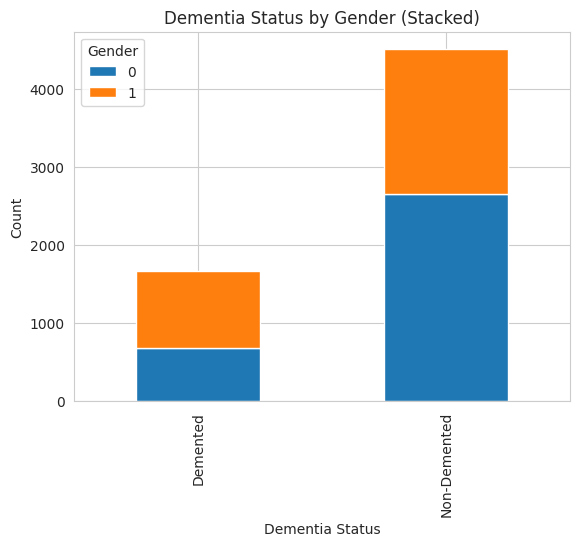

In [ ]:


# Create a stacked bar plot
plt.figure(figsize=(8, 6))
df_grouped = df.groupby(["Dementia_Status", "Gender"]).size().unstack()
df_grouped.plot(kind="bar", stacked=True)
plt.xlabel("Dementia Status")
plt.ylabel("Count")
plt.title("Dementia Status by Gender (Stacked)")
plt.show()


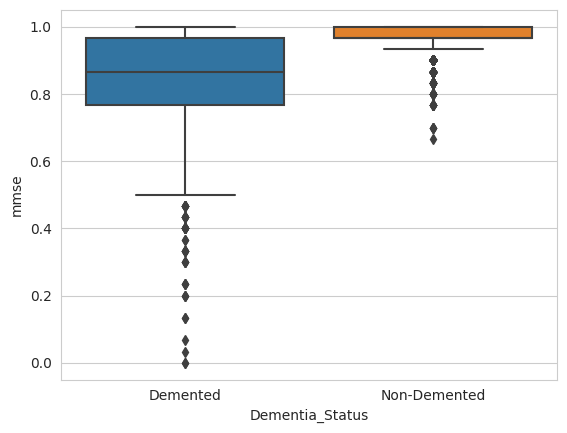

In [ ]:


# Example for 'mmse' feature
sns.boxplot(data=df, x='Dementia_Status', y='normalized_mmse')
plt.xlabel('Dementia_Status')
plt.ylabel('mmse')
plt.show()


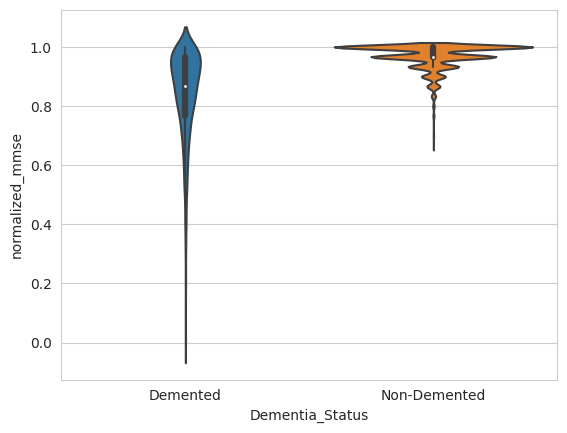

In [ ]:

sns.violinplot(data=df, x='Dementia_Status', y='normalized_mmse')
plt.xlabel('Dementia_Status')
plt.ylabel('normalized_mmse')
plt.show()


## Undersampling the majority class involves reducing the number of samples in the majority class to balance the class distribution.

In [ ]:
pip install imbalanced-learn


In [ ]:
label_encoder = LabelEncoder()
df['Dementia_Status'] = label_encoder.fit_transform(df['Dementia_Status'])

<ipython-input-18-fa26af94eea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dementia_Status'] = label_encoder.fit_transform(df['Dementia_Status'])


In [ ]:
df.head()

,Subject,Gender,ageAtEntry,cdr,commun,dx1,homehobb,judgment,memory,orient,perscare,apoe,sumbox,height,weight,normalized_mmse,Dementia_Status
0,OAS30124,0,0.690729,1.0,1.0,AD Dementia,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.392857,0.239382,0.533333,0
1,OAS30354,1,0.455244,2.0,2.0,Frontotemporal demt. prim,2.0,1.0,0.5,0.5,2.0,33.0,8.0,0.571429,0.440154,0.966667,0
2,OAS31129,0,0.482263,1.0,1.0,AD Dementia,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.428571,0.200772,0.666667,0
3,OAS30813,0,0.528926,0.0,0.0,Cognitively normal,0.0,0.5,0.0,0.0,0.0,33.0,0.5,0.500000,0.343629,1.000000,1
4,OAS30184,0,0.576415,0.0,0.0,Cognitively normal,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.607143,0.436293,1.000000,1


In [ ]:
# Drop columns from the DataFrame
columns_to_drop = ['Subject', 'dx1']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-19-87cce7842daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.head()

,Gender,ageAtEntry,cdr,commun,homehobb,judgment,memory,orient,perscare,apoe,sumbox,height,weight,normalized_mmse,Dementia_Status
0,0,0.690729,1.0,1.0,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.392857,0.239382,0.533333,0
1,1,0.455244,2.0,2.0,2.0,1.0,0.5,0.5,2.0,33.0,8.0,0.571429,0.440154,0.966667,0
2,0,0.482263,1.0,1.0,1.0,1.0,1.0,1.0,0.0,34.0,5.0,0.428571,0.200772,0.666667,0
3,0,0.528926,0.0,0.0,0.0,0.5,0.0,0.0,0.0,33.0,0.5,0.500000,0.343629,1.000000,1
4,0,0.576415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.607143,0.436293,1.000000,1


## In this example, RandomUnderSampler is used to perform **random undersampling**. The sampling_strategy parameter determines the ratio of minority class to majority class after undersampling. Setting it to 'auto' will balance the classes.

## After undersampling, you'll have a balanced training set with equal representation of both classes.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Dementia_Status'])
y = df['Dementia_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print the class distribution after undersampling
print(y_train_resampled.value_counts())



0    1308
1    1308
Name: Dementia_Status, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Calculate correlation matrix (if needed)
# correlation_matrix = X_train_resampled.corr()

# Print correlation of each feature with the target variable "Dementia Status"
# correlation_with_target = correlation_matrix['Dementia_Status'].sort_values(ascending=False)
# print("Correlation with Target Variable:")
# print(correlation_with_target)

# Perform ANOVA tests for each feature with the target variable "Dementia Status"
anova_results = {}
for feature in X_train_resampled.columns:
    groups = [X_train_resampled.loc[y_train_encoded == label, feature] for label in np.unique(y_train_encoded)]
    anova_result = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': anova_result.statistic, 'p-value': anova_result.pvalue}

# Print ANOVA results for each feature
print("\nANOVA Results:")
for feature, result in anova_results.items():
    print(f"Feature: {feature}, F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")



ANOVA Results:
Feature: Gender, F-statistic: 83.40889240613222, p-value: 1.3001898654368574e-19
Feature: ageAtEntry, F-statistic: 319.8037759655427, p-value: 1.4426820764881205e-67
Feature: cdr, F-statistic: 3840.9877669846487, p-value: 0.0
Feature: commun, F-statistic: 1055.71843667577, p-value: 8.068245907052185e-195
Feature: homehobb, F-statistic: 1209.512261094867, p-value: 3.825958970863834e-218
Feature: judgment, F-statistic: 1760.5012012299505, p-value: 1.3044908888930212e-294
Feature: memory, F-statistic: 3366.0665752360283, p-value: 0.0
Feature: orient, F-statistic: 1217.7155281245618, p-value: 2.3185774657631837e-219
Feature: perscare, F-statistic: 319.4261209988573, p-value: 1.7079291451119835e-67
Feature: apoe, F-statistic: 34.630220301428146, p-value: 4.495855714390274e-09
Feature: sumbox, F-statistic: 1725.088212690269, p-value: 5.393528053560438e-290
Feature: height, F-statistic: 1.07903408747581, p-value: 0.29900981083617845
Feature: weight, F-statistic: 5.063980127548

In [ ]:
print(X_train.columns)


Index(['Gender', 'ageAtEntry', 'cdr', 'commun', 'homehobb', 'judgment',
       'memory', 'orient', 'perscare', 'apoe', 'sumbox', 'normalized_mmse'],
      dtype='object')


Features with low p-values (typically < 0.05) are considered statistically significant, indicating that there is a strong evidence that the feature is associated with the target variable. On the other hand, features with high p-values may not have a significant association with the target variable.

Gender: The p-value of 1.30e-19 indicates that there is a statistically significant association between gender and the target variable (Dementia Status).

ageAtEntry: The very low p-value (1.44e-67) suggests a strong correlation between the age at entry and Dementia Status. This is expected as age is a known risk factor for dementia.

cdr: The extremely low p-value (0.0) indicates a highly significant relationship between CDR (Clinical Dementia Rating) and Dementia Status. CDR is a clinical measure specifically related to dementia assessment.

commun: The very low p-value (8.07e-195) suggests a strong association between communication abilities and Dementia Status.

homehobb: Similarly, the low p-value (3.83e-218) indicates a significant correlation between home-related hobbies/activities and Dementia Status.

judgment: The very low p-value (1.30e-294) suggests a strong relationship between judgment abilities and Dementia Status.

memory: The extremely low p-value (0.0) indicates a highly significant association between memory function and Dementia Status.

orient: The very low p-value (2.32e-219) suggests a strong correlation between orientation and Dementia Status.

perscare: The low p-value (1.71e-67) indicates a significant association between perceived care or assistance needed and Dementia Status.

apoe: The p-value of 4.50e-09 indicates a significant relationship between APOE genetic information and Dementia Status.

sumbox: The extremely low p-value (5.39e-290) suggests a highly significant correlation between the 'sumbox' measure and Dementia Status. However, since the nature of 'sumbox' is unclear, further investigation is needed.

height: The p-value of 0.30 suggests that there might not be a strong association between height and Dementia Status.

weight: The p-value of 0.02 indicates that there is a statistically significant relationship between weight and Dementia Status, although the significance might not be as strong as some other features.

normalized_mmse: The very low p-value (3.59e-163) suggests a strong correlation between the normalized MMSE scores and Dementia Status. This indicates that cognitive function, as measured by MMSE, is closely related to Dementia Status.

considering the ANOVA results and the significance of the features, it would be a good idea to drop the columns that have higher p-values and are not strongly correlated with the target variable "Dementia Status." This can help simplify your dataset, reduce noise, and potentially improve the performance of your machine learning models.

# ANOVA and correlation analysis

In [ ]:

from sklearn.feature_selection import f_classif
from scipy.stats import pearsonr

# Load your preprocessed dataset into X_train and X_test
# X_train and X_test should contain only the numeric features

# Perform ANOVA for feature selection
def perform_anova(X_train, y_train):
    f_scores, p_values = f_classif(X_train, y_train)
    return f_scores, p_values

# Perform correlation analysis for feature selection
def perform_correlation(X_train, y_train):
    correlation_values = []
    for feature in X_train.columns:
        corr, _ = pearsonr(X_train[feature], y_train)
        correlation_values.append(corr)
    return np.abs(correlation_values)

# Feature selection using ANOVA
f_scores, p_values = perform_anova(X_train, y_train)

# Feature selection using correlation analysis
correlation_values = perform_correlation(X_train, y_train)

# Combine ANOVA and correlation scores
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'ANOVA F-Score': f_scores, 'Correlation': correlation_values})
feature_scores['Combined Score'] = feature_scores['ANOVA F-Score'] * feature_scores['Correlation']

# Sort features by combined score in descending order
feature_scores = feature_scores.sort_values(by='Combined Score', ascending=False)

# Print the top selected features
num_selected_features = 10
selected_features = feature_scores.head(num_selected_features)['Feature']
print("Selected Features:")
print(selected_features)

# Use the selected features for training and testing
X_train = X_train[selected_features]
X_test = X_test[selected_features]


Selected Features:
2                 cdr
6              memory
10             sumbox
5            judgment
7              orient
4            homehobb
3              commun
13    normalized_mmse
8            perscare
1          ageAtEntry
Name: Feature, dtype: object


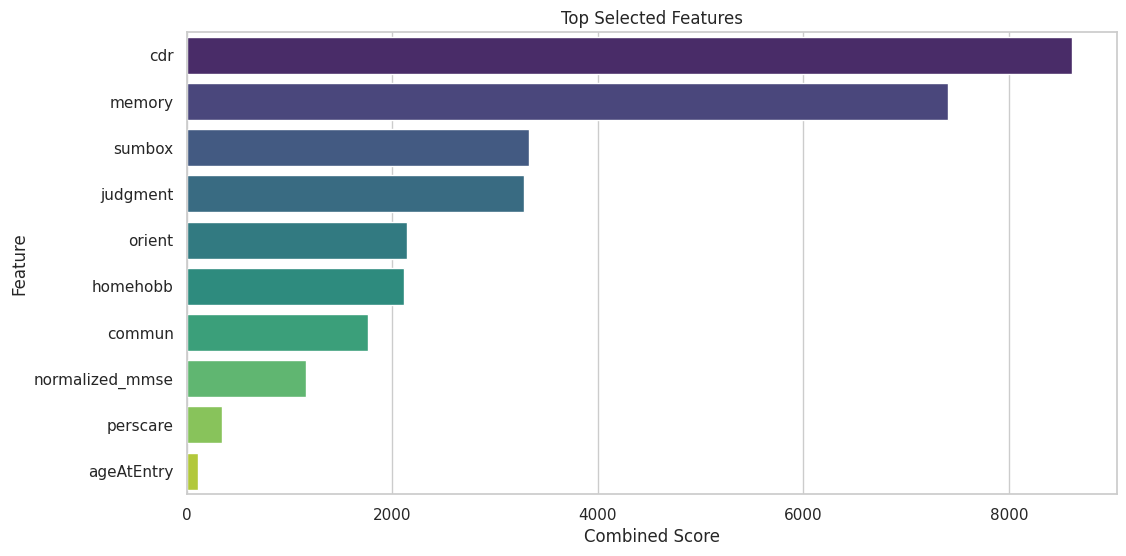

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot to visualize the combined scores of selected features
plt.figure(figsize=(12, 6))
sns.barplot(x="Combined Score", y="Feature", data=feature_scores.head(num_selected_features), palette="viridis")
plt.xlabel("Combined Score")
plt.ylabel("Feature")
plt.title("Top Selected Features")
plt.show()


In [ ]:
columns_to_drop = ['height', 'weight', 'Gender', 'apoe']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['ageAtEntry', 'cdr', 'commun', 'homehobb', 'judgment', 'memory',
       'orient', 'perscare', 'sumbox', 'normalized_mmse', 'Dementia_Status'],
      dtype='object')



Feature selection is performed using Recursive Feature Elimination (RFE) with an estimator of RandomForestClassifier() and a target number of selected features (n_features_to_select) set to 10. This process ranks and selects the most important features based on the RandomForest model.

Class weights are calculated based on the class distribution of the training data using the value_counts() method. This is important for handling imbalanced classes, as it assigns higher weights to the minority class to ensure better representation during model training.

A RandomForestClassifier is initialized with the calculated class weights and a random seed of 42.

The model is trained on the selected features and under-sampled data using fit().

Predictions are made on the test set using the trained model.

The classification_report() function is used to generate a classification report, which includes metrics such as precision, recall, F1-score, and support for each class. This allows you to evaluate the model's performance on the test data.

In [ ]:
df.head()

,ageAtEntry,cdr,commun,homehobb,judgment,memory,orient,perscare,sumbox,normalized_mmse,Dementia_Status
0,0.690729,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,0.533333,0
1,0.455244,2.0,2.0,2.0,1.0,0.5,0.5,2.0,8.0,0.966667,0
2,0.482263,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,0.666667,0
3,0.528926,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,1.000000,1
4,0.576415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1


# **1 Logistic Regression**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming df is your feature-engineered DataFrame
# Load your data and split it into features (X) and target (y)
X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9975728155339806

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       313
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix:
 [[313   0]
 [  3 920]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

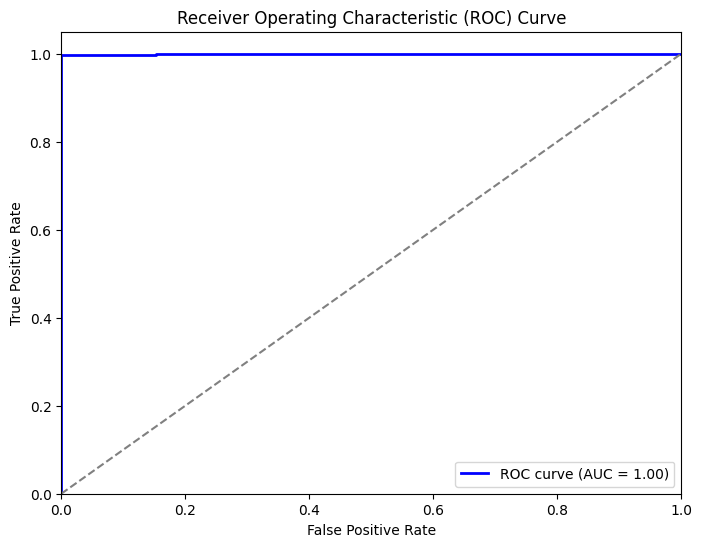

In [ ]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Create a logistic regression model with class weights:

An ROC curve with an area of 1.00 indicates that the model has achieved perfect discrimination between the classes. This means that the model has correctly separated all instances of one class from the other class. In the context of your classification task, this would mean that your logistic regression model is making highly accurate predictions and is able to distinguish between "Non-Demented" and "Demented" cases extremely well.

# **2 RandomForest**

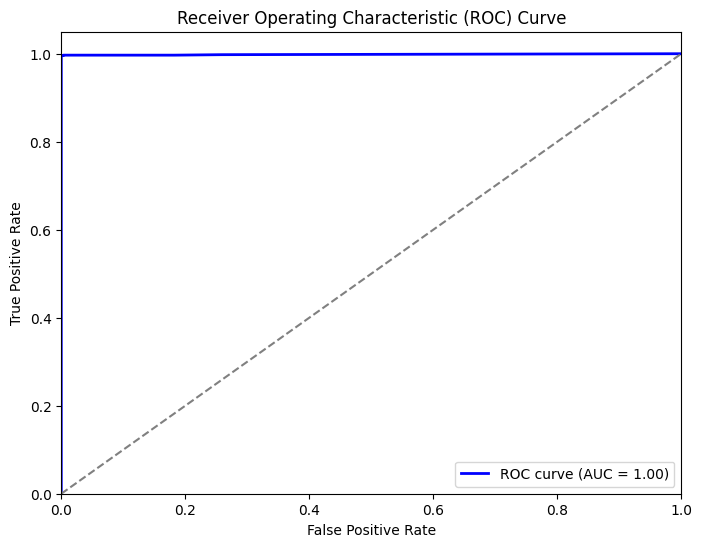

Accuracy: 0.9967637540453075

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       313
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1236
   macro avg       0.99      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


# Assuming df is your feature-engineered DataFrame
# Load your data and split it into features (X) and target (y)
X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


# **3 XG Boost**

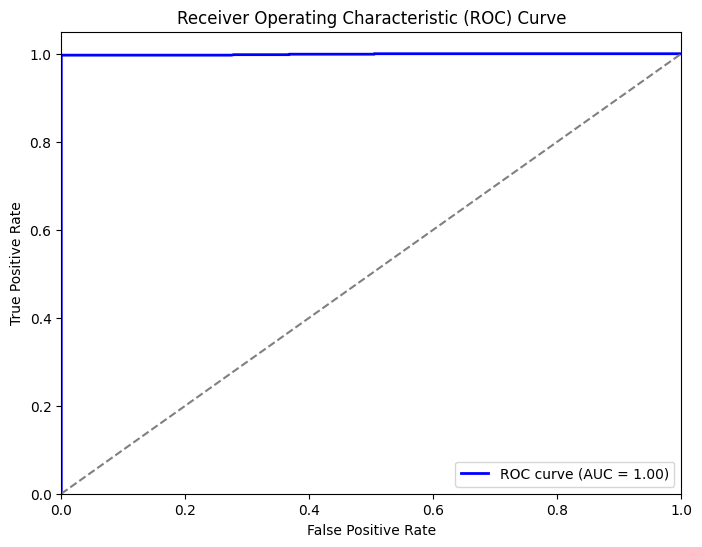

Accuracy: 0.9967637540453075

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       313
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1236
   macro avg       0.99      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



In [ ]:

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


# Assuming df is your feature-engineered DataFrame
# Load your data and split it into features (X) and target (y)
X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


# **4 Support Vector Machine**

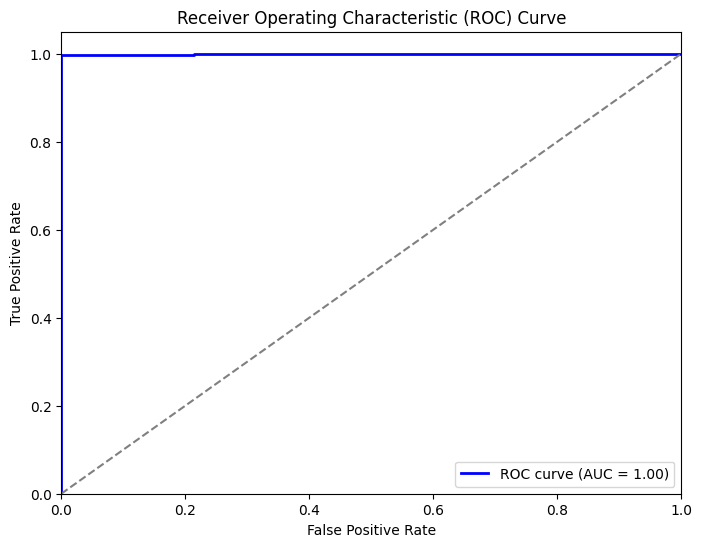

Accuracy: 0.9975728155339806

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       313
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score



X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
model = SVC(probability=True, random_state=42)  # Set probability=True for ROC curve
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


# **5 Decision Tree**

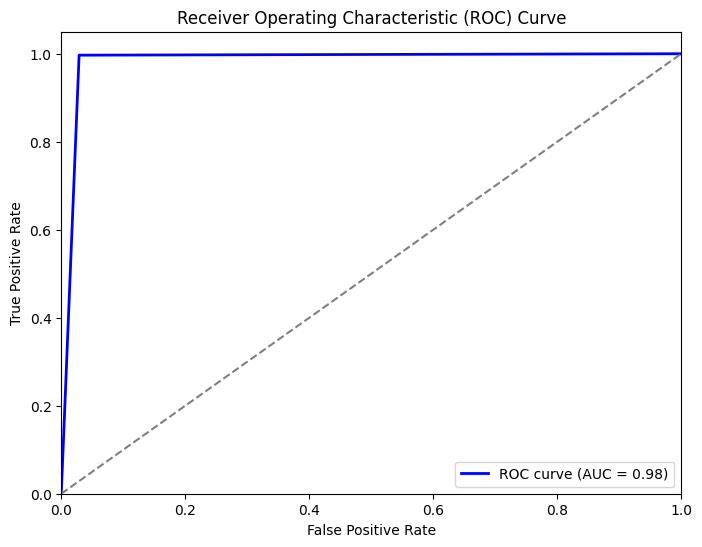

Accuracy: 0.9902912621359223

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       313
           1       0.99      1.00      0.99       923

    accuracy                           0.99      1236
   macro avg       0.99      0.98      0.99      1236
weighted avg       0.99      0.99      0.99      1236



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


# **6 Ada Boost**

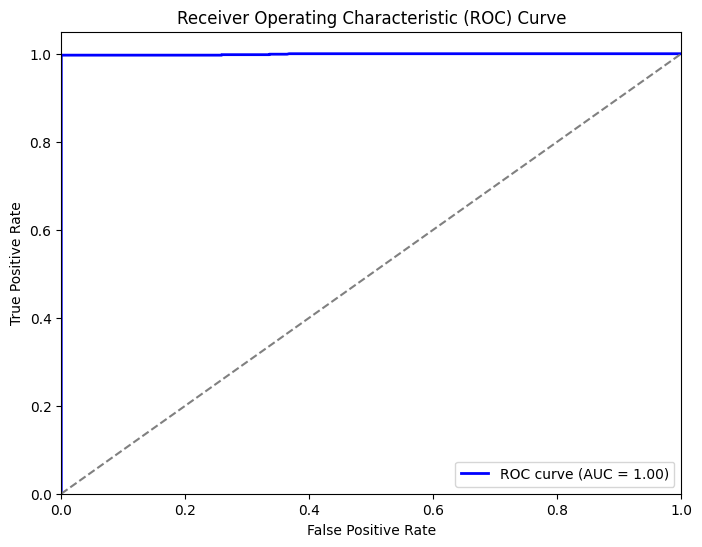

Accuracy: 0.9975728155339806

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       313
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the AdaBoost classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


# **7 Naive bayes**

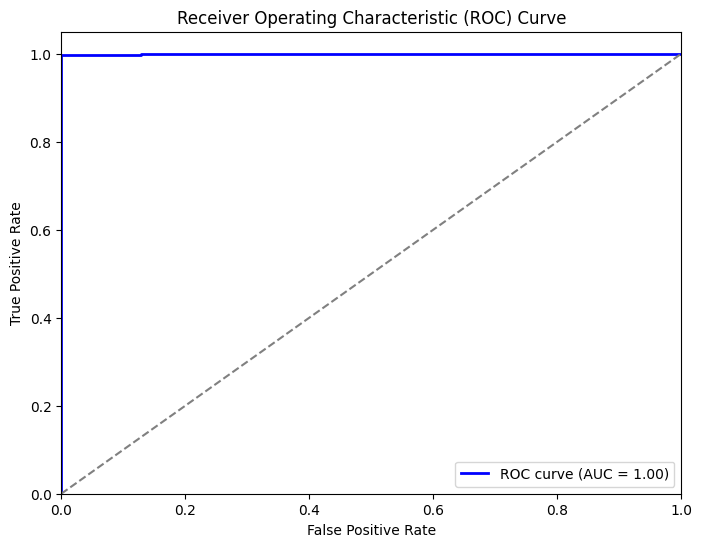

Accuracy: 0.988673139158576

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       313
           1       1.00      0.98      0.99       923

    accuracy                           0.99      1236
   macro avg       0.98      0.99      0.99      1236
weighted avg       0.99      0.99      0.99      1236



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score



X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the Naive Bayes classifier
model.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# Load your data and split it into features (X) and target (y)
X = df.drop(columns=['Dementia_Status'])  # Features
y = df['Dementia_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
}

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Collect evaluation metrics
results = []

for model_name, model in models.items():
    if model_name == 'Naive Bayes':
        # Naive Bayes doesn't require scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    results.append((model_name, accuracy, auc))

# Create a DataFrame to compare results
comparison_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'AUC'])

# Display the comparison
print(comparison_df)


                 Model  Accuracy       AUC
0  Logistic Regression  0.997573  0.999612
1        Random Forest  0.996764  0.998394
2              XGBoost  0.996764  0.998756
3                  SVM  0.997573  0.999367
4             AdaBoost  0.997573  0.998960
5        Decision Tree  0.990291  0.983993
6          Naive Bayes  0.988673  0.933530


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


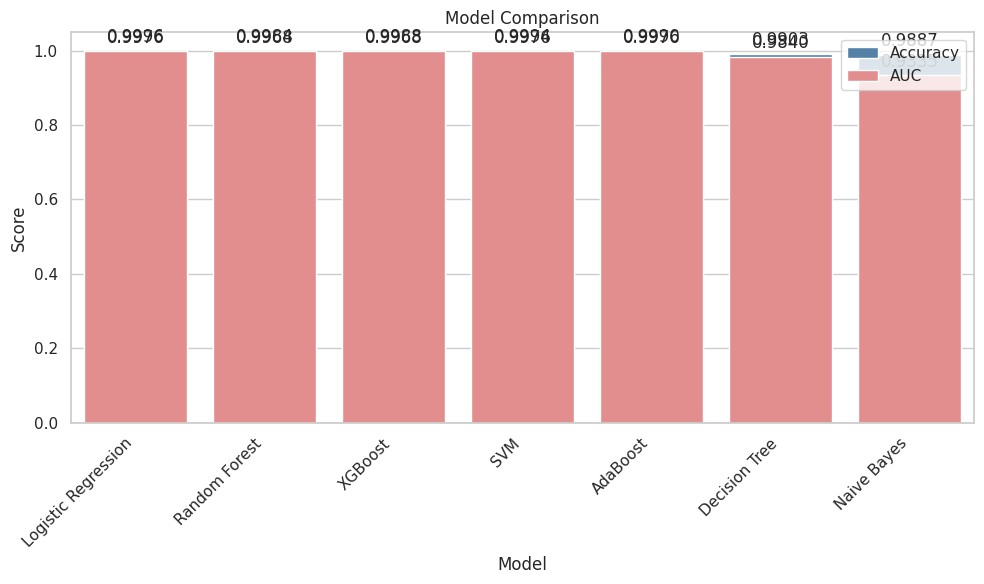

In [ ]:


# Create a DataFrame with the evaluation results
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'AdaBoost', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [0.997573, 0.996764, 0.996764, 0.997573, 0.997573, 0.990291, 0.988673],
    'AUC': [0.999612, 0.998394, 0.998756, 0.999367, 0.998960, 0.983993, 0.933530]
}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a grouped bar plot
ax = sns.barplot(x="Model", y="Accuracy", data=df, color='steelblue', label='Accuracy')
sns.barplot(x="Model", y="AUC", data=df, color='lightcoral', label='AUC')

# Add values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add legend
ax.legend()

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()


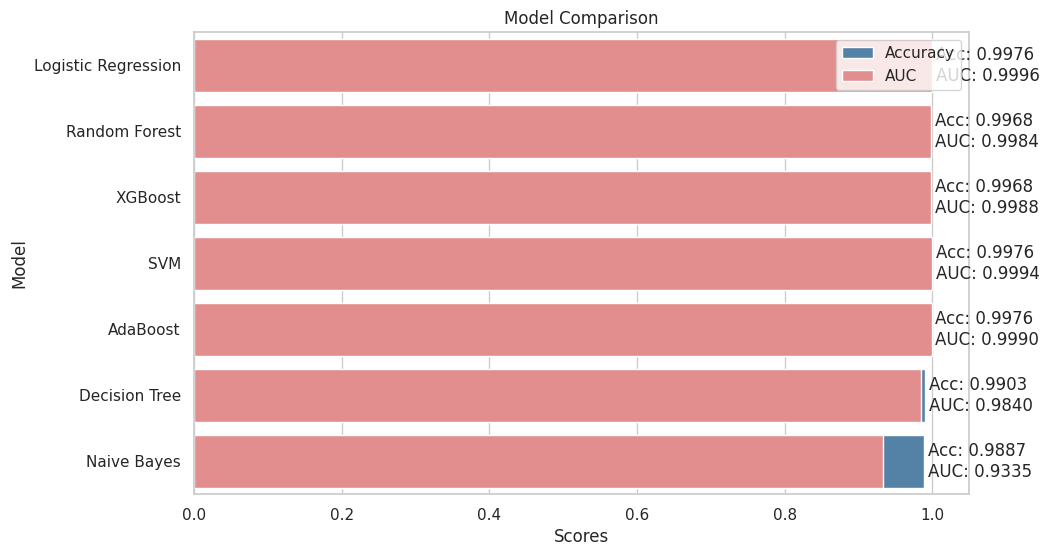

In [ ]:


# Create a DataFrame with the evaluation results
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'AdaBoost', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [0.997573, 0.996764, 0.996764, 0.997573, 0.997573, 0.990291, 0.988673],
    'AUC': [0.999612, 0.998394, 0.998756, 0.999367, 0.998960, 0.983993, 0.933530]
}

df = pd.DataFrame(data)

# Set the style using Seaborn
sns.set(style='whitegrid')

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Accuracy', y='Model', data=df, color='steelblue', label='Accuracy')
ax = sns.barplot(x='AUC', y='Model', data=df, color='lightcoral', label='AUC')

# Add values on each bar
for i, (acc, auc) in enumerate(zip(df['Accuracy'], df['AUC'])):
    ax.text(max(acc, auc) + 0.005, i, f'Acc: {acc:.4f}\nAUC: {auc:.4f}', va='center')

# Customize the plot
plt.xlabel('Scores')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.legend()

# Show the plot
plt.show()


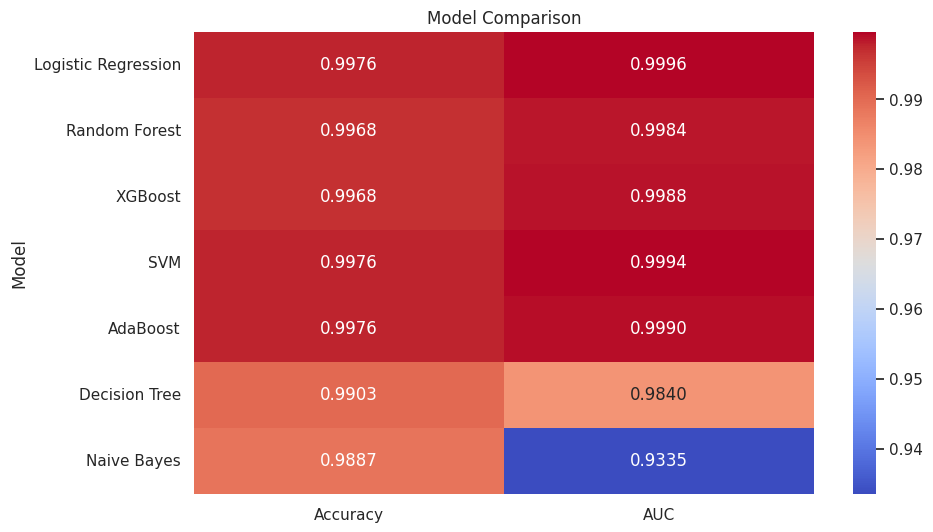

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Model'), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Model Comparison')
plt.show()


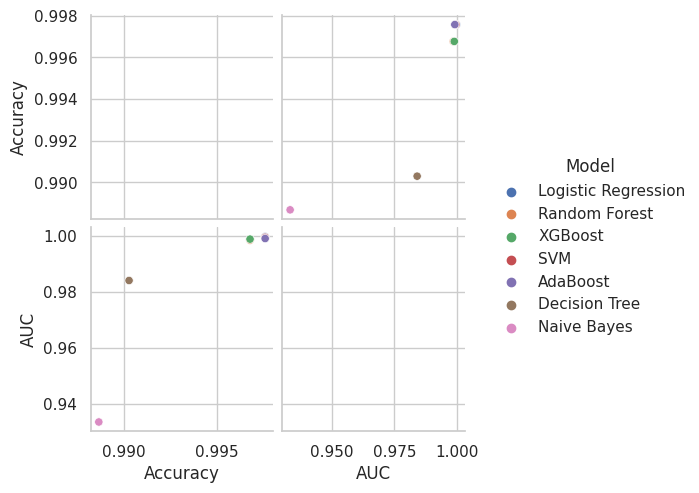

In [ ]:
sns.pairplot(df, hue='Model')
plt.show()


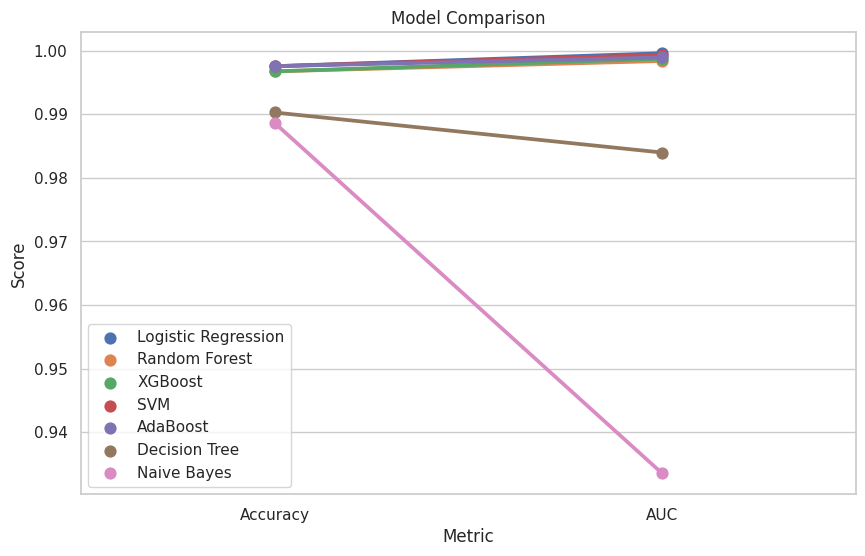

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()


Model: Logistic Regression
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [0.9878481  0.99746835 0.99746835 0.99746835 0.99676113 0.99654154
 0.99624006 0.99550775 0.99589426 0.99610324]
Validation Scores Mean: [0.96923118 0.99615426 0.99595203 0.99615426 0.99615426 0.99615426
 0.99574981 0.99574981 0.99595203 0.99615426]


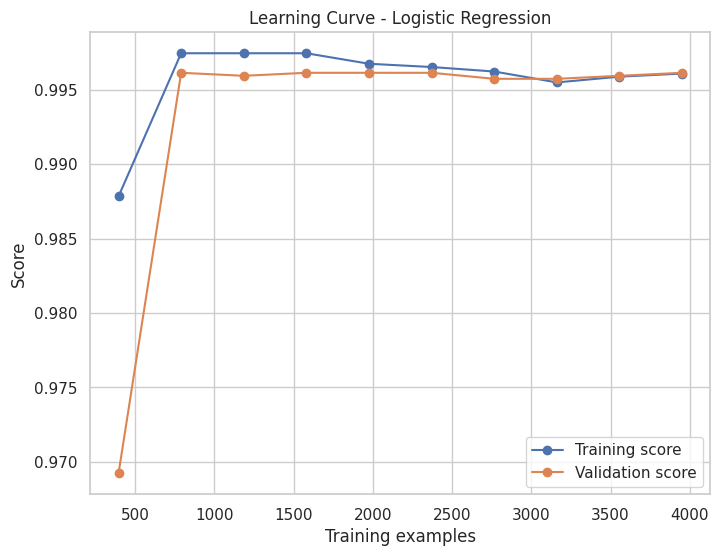

Model: Random Forest
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [1.         1.         1.         1.         0.99969636 0.99966259
 0.99978308 0.99974692 0.99977503 0.99979757]
Validation Scores Mean: [0.99453482 0.99534474 0.99534495 0.99595203 0.9949405  0.99554738
 0.99514252 0.99574981 0.99595224 0.99574981]


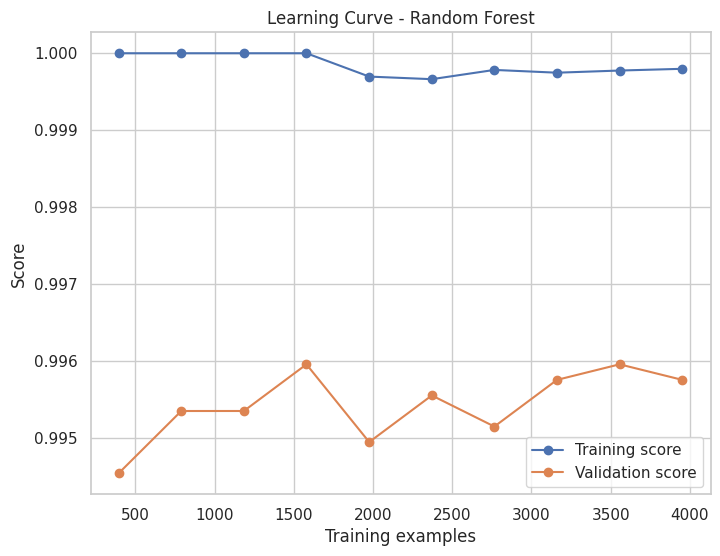

Model: XGBoost
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [0.99797468 0.99746835 0.99831224 0.99810127 0.99797571 0.99848165
 0.99877079 0.99905093 0.99910011 0.99924089]
Validation Scores Mean: [0.99615426 0.99615426 0.99574981 0.99574981 0.99574981 0.99574981
 0.99554758 0.99514252 0.99514252 0.99514252]


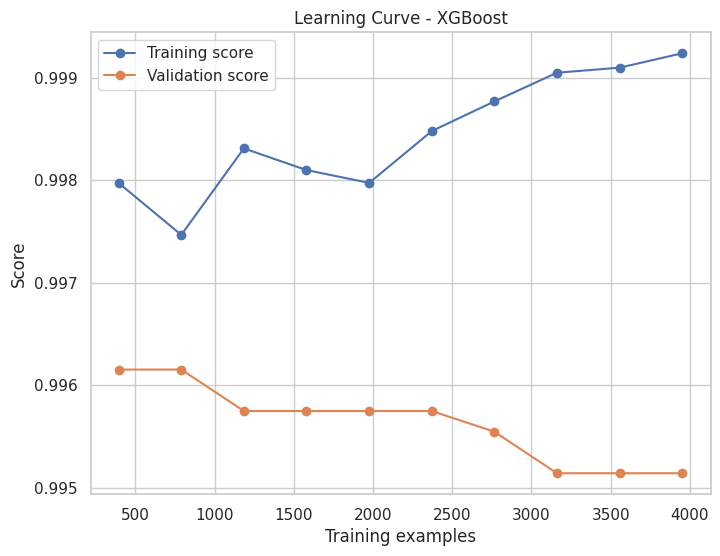

Model: SVM
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [0.99797468 0.99746835 0.99746835 0.99746835 0.99676113 0.99654154
 0.99624006 0.99557102 0.99595051 0.99615385]
Validation Scores Mean: [0.99615426 0.99615426 0.99615426 0.99615426 0.99615426 0.99615426
 0.99615426 0.99615426 0.99615426 0.99615426]


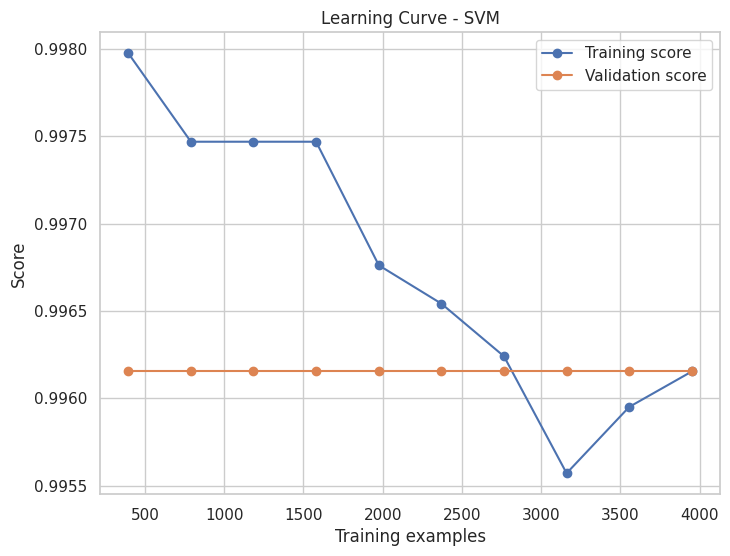

Model: Decision Tree
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [1.         1.         1.         1.         0.99969636 0.99974694
 0.99978308 0.99981019 0.99983127 0.99984818]
Validation Scores Mean: [0.99372511 0.98947512 0.99170245 0.99291764 0.99251155 0.99089417
 0.99068969 0.99129637 0.9906899  0.99230933]


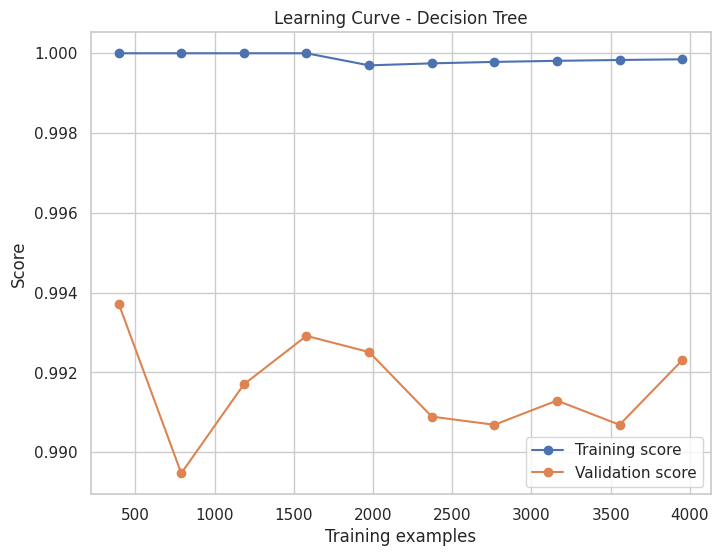

Model: Naive Bayes
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [0.98734177 0.98708861 0.98835443 0.98759494 0.98623482 0.98726276
 0.9868402  0.98664979 0.98734533 0.98795547]
Validation Scores Mean: [0.97145974 0.9864395  0.98826136 0.98745164 0.98704679 0.9878565
 0.98826136 0.98805893 0.98805893 0.98805893]


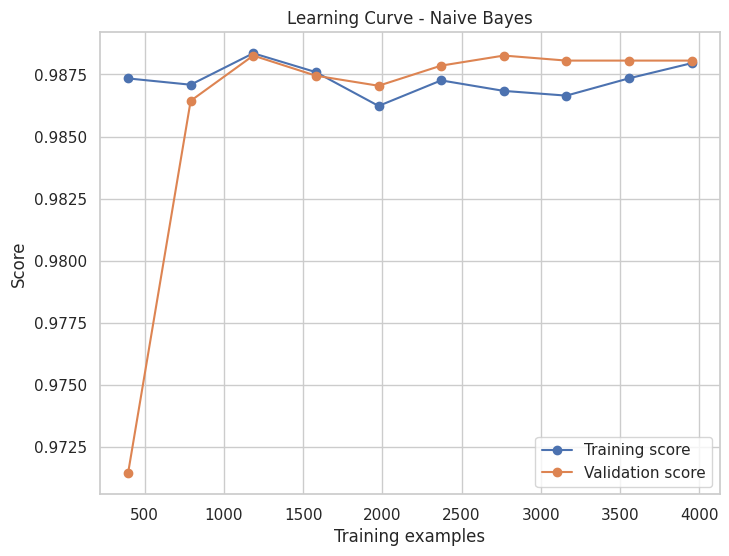

Model: Ada Boost
Train Sizes: [ 395  790 1185 1580 1976 2371 2766 3161 3556 3952]
Train Scores Mean: [1.         1.         1.         1.         0.99807692 0.99721636
 0.9966739  0.99576084 0.99623172 0.99635628]
Validation Scores Mean: [0.99311782 0.99311864 0.99332107 0.99392794 0.99554697 0.99615426
 0.99595183 0.9957494  0.9957494  0.99615426]


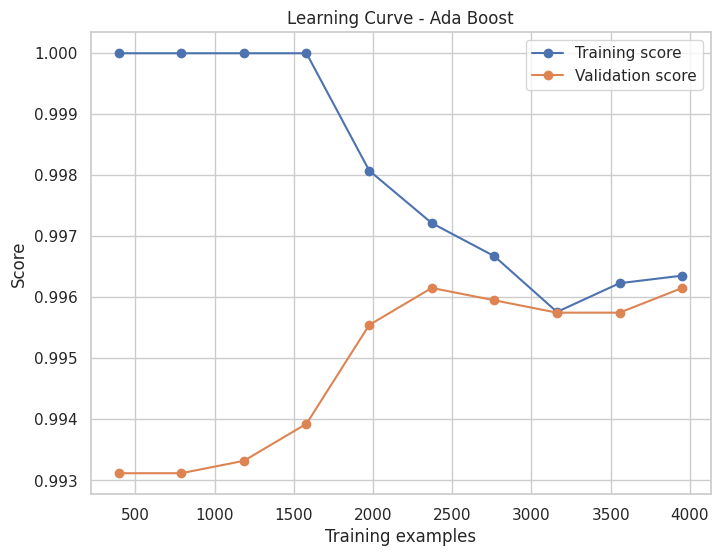

In [ ]:

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Ada Boost',AdaBoostClassifier(random_state=42) )
]

# Generate learning curve data and create separate plots for each model
for model_name, model in models:
    plt.figure(figsize=(8, 6))

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    print(f"Model: {model_name}")
    print("Train Sizes:", train_sizes)
    print("Train Scores Mean:", train_scores_mean)
    print("Validation Scores Mean:", val_scores_mean)
    print("="*30)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score')

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title(f"Learning Curve - {model_name}")
    plt.legend(loc="best")
    plt.show()


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier



# Create a model
model = RandomForestClassifier(random_state=42)

# Create a cross-validation object (KFold with 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy Scores:", scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Accuracy Scores: [0.99676375 0.99676375 0.99595142 0.99433198 0.9951417 ]
Mean Accuracy: 0.995790521861038
Standard Deviation of Accuracy: 0.0009453625290862691


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Ada Boost',AdaBoostClassifier(random_state=42))
]

# Perform cross-validation for each model
for model_name, model in models:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    print(f"Model: {model_name}")
    print("Cross-Validation ROC AUC Scores:", scores)
    print("Mean ROC AUC:", np.mean(scores))
    print("Standard Deviation of ROC AUC:", np.std(scores))
    print("=" * 30)


Model: Logistic Regression
Cross-Validation ROC AUC Scores: [0.99979215 0.99899567 0.99791255 0.99941072 0.9970203 ]
Mean ROC AUC: 0.9986262783767039
Standard Deviation of ROC AUC: 0.0010197678067390785
Model: Random Forest
Cross-Validation ROC AUC Scores: [0.99999169 0.99712836 0.99707191 0.99862834 0.99668904]
Mean ROC AUC: 0.9979018657407768
Standard Deviation of ROC AUC: 0.001237191200595214
Model: XGBoost
Cross-Validation ROC AUC Scores: [0.99989192 0.99663783 0.99778104 0.99899456 0.99673565]
Mean ROC AUC: 0.9980082003905032
Standard Deviation of ROC AUC: 0.001270448095424254
Model: SVM
Cross-Validation ROC AUC Scores: [0.99930994 0.99946458 0.99576517 0.99849517 0.99444012]
Mean ROC AUC: 0.9974949948290843
Standard Deviation of ROC AUC: 0.0020247585786516593
Model: Decision Tree
Cross-Validation ROC AUC Scores: [0.98743428 0.9913751  0.98861223 0.99288535 0.98916655]
Mean ROC AUC: 0.9898946994522719
Standard Deviation of ROC AUC: 0.001967950996344423
Model: Naive Bayes
Cross-Val

# separate distribution plots for each feature, showing the distribution for both the "Non-Demented" and "Demented" classes. Each plot will have its own title based on the feature name.

<Figure size 1000x600 with 0 Axes>

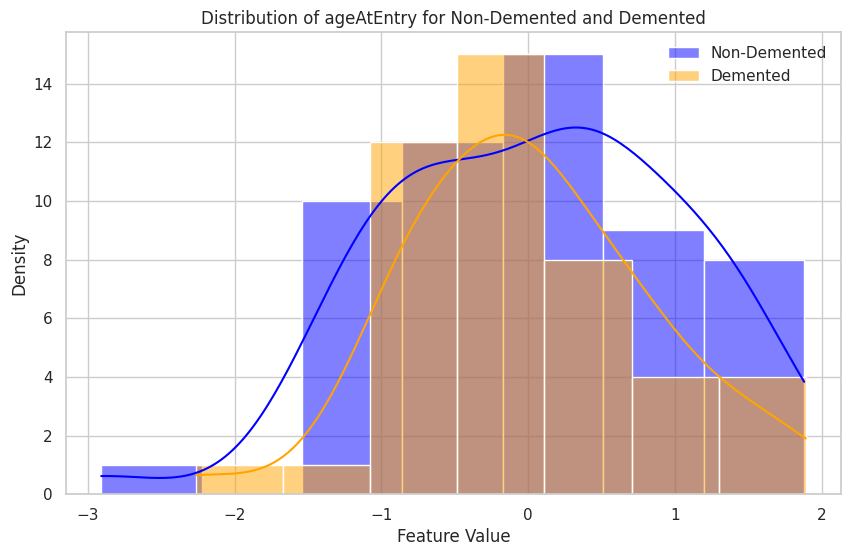

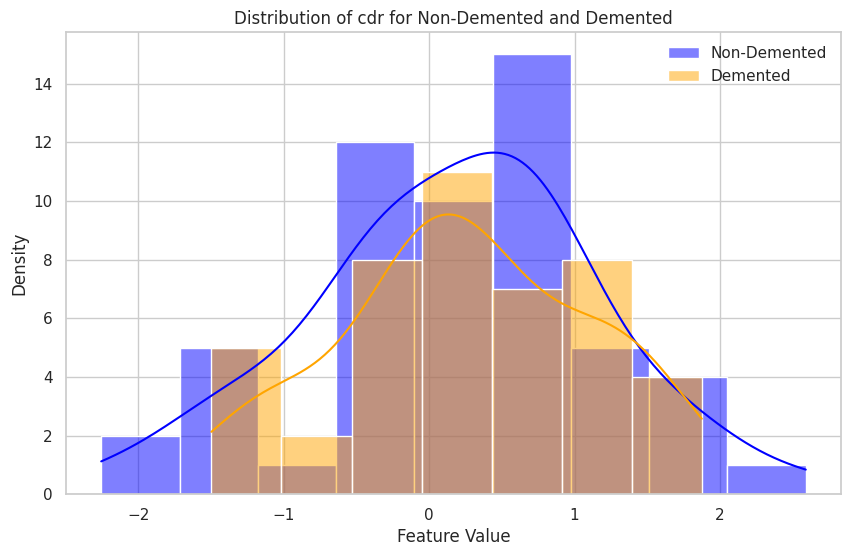

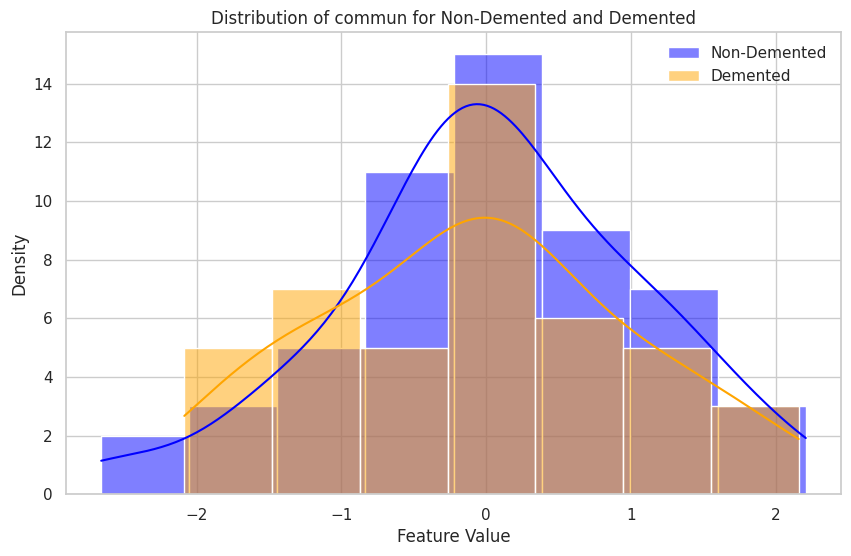

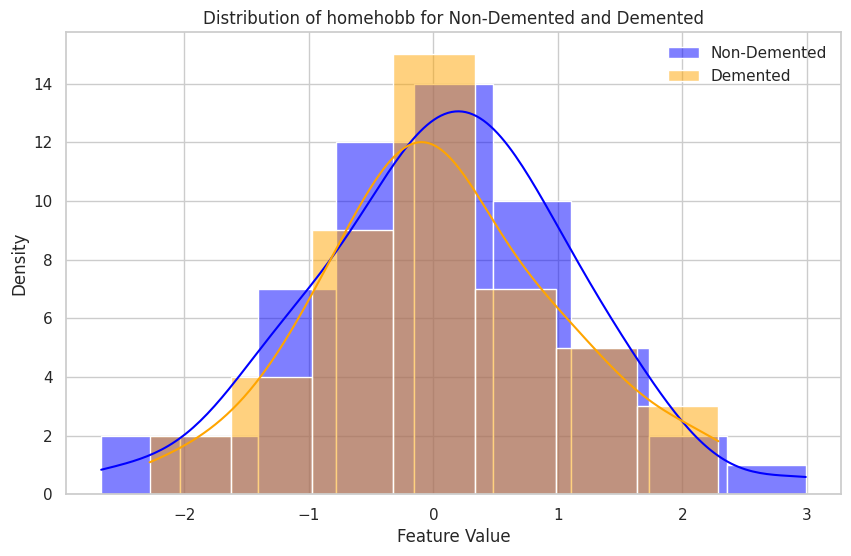

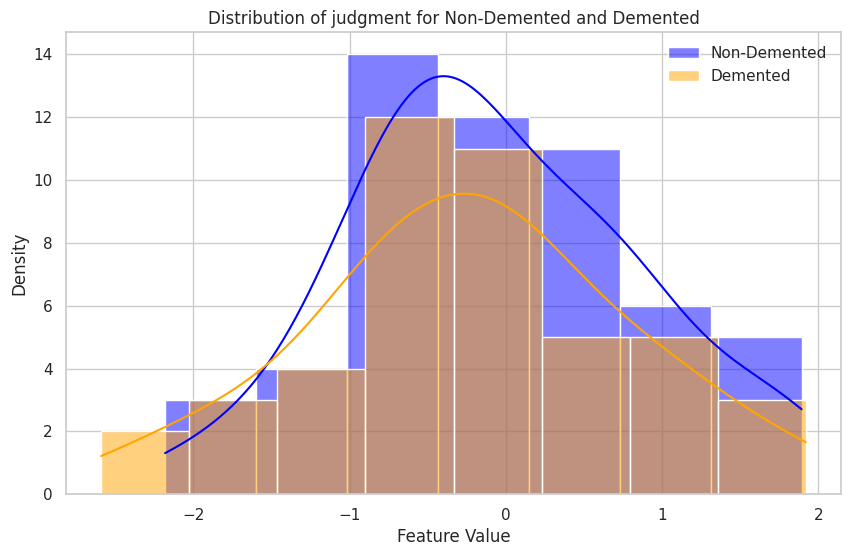

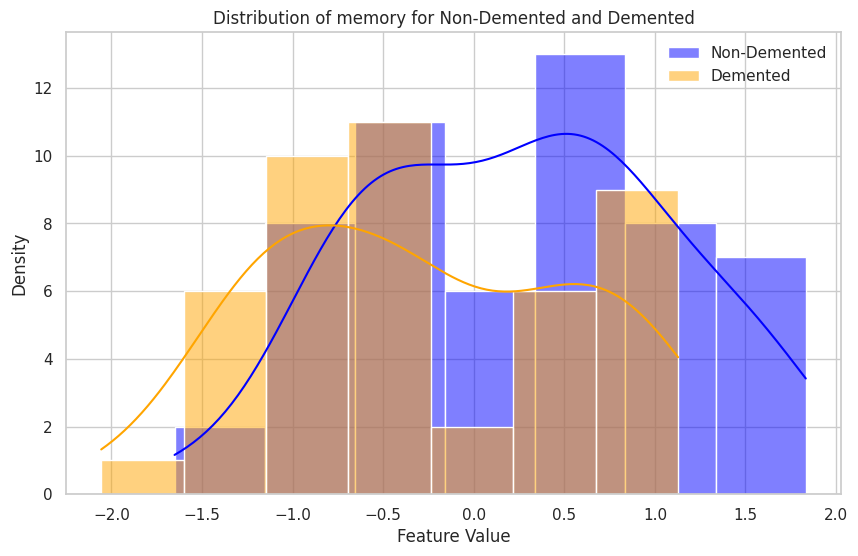

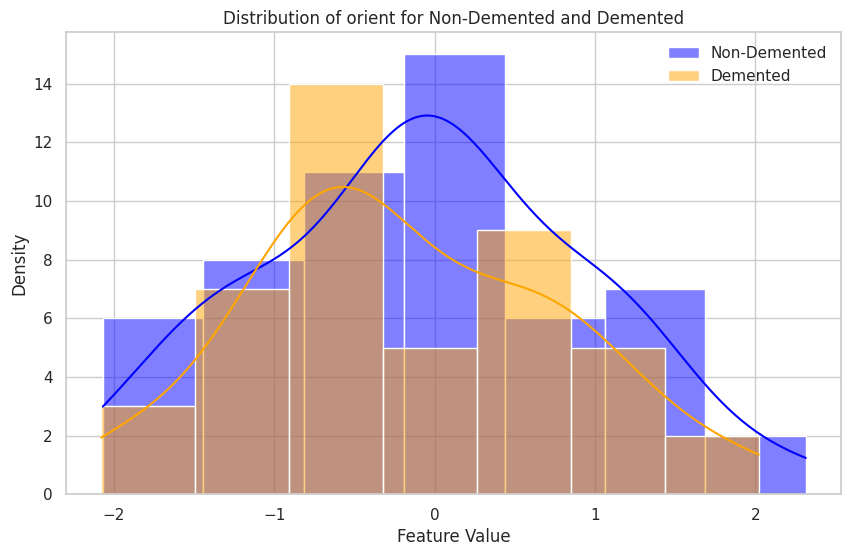

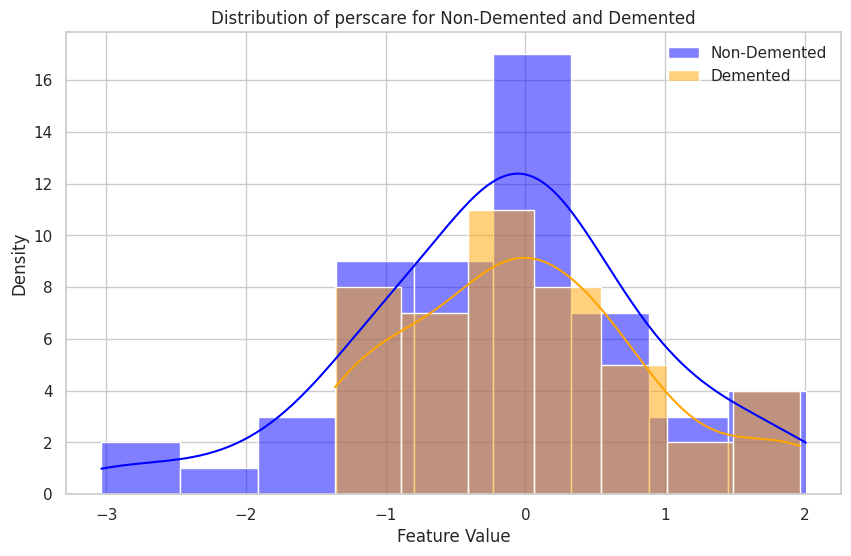

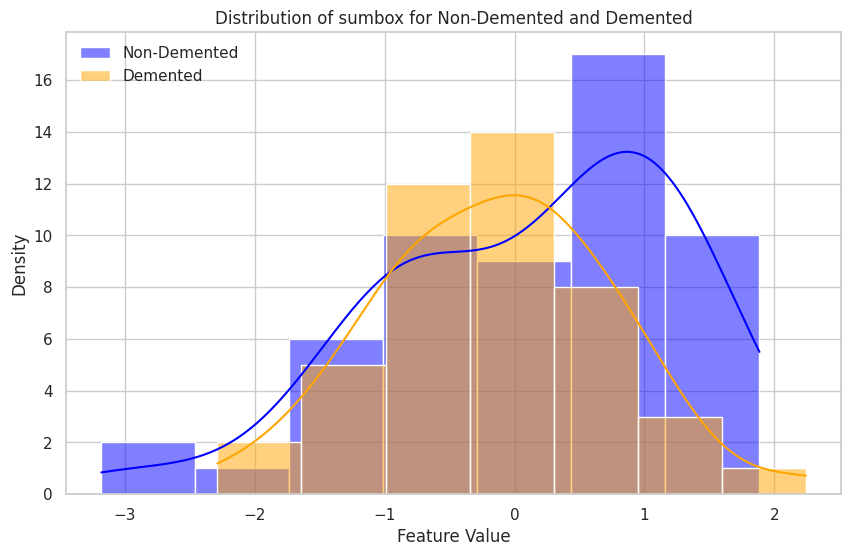

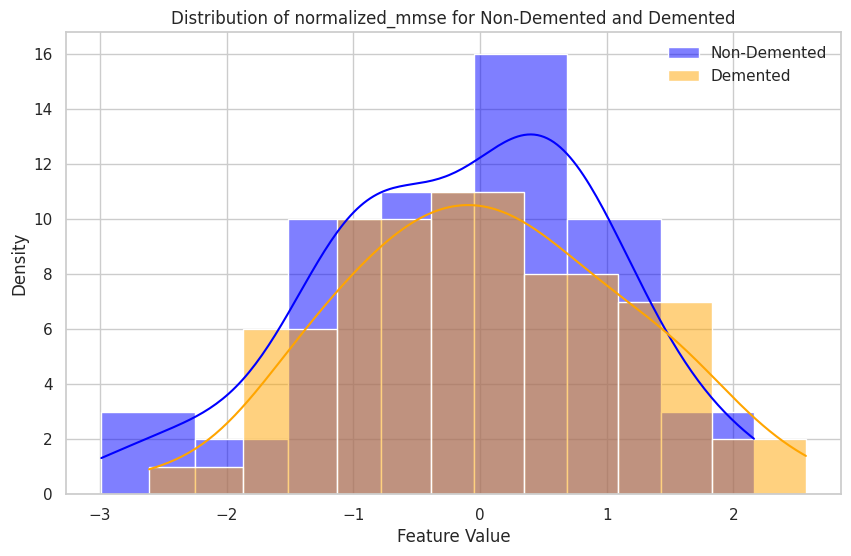

In [ ]:


# Define the feature column names
feature_names = ['ageAtEntry', 'cdr', 'commun', 'homehobb', 'judgment', 'memory',
                 'orient', 'perscare', 'sumbox', 'normalized_mmse']

# Create a DataFrame for the features and target variable
data = pd.DataFrame(X, columns=feature_names)
data['Dementia_Status'] = y

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each feature and create distribution plots
for feature_name in feature_names:
    plt.figure(figsize=(10, 6))

    # Plot the distribution for Non-Demented class
    sns.histplot(data=data[data['Dementia_Status'] == 0], x=feature_name, kde=True, color='blue', label='Non-Demented')

    # Plot the distribution for Demented class
    sns.histplot(data=data[data['Dementia_Status'] == 1], x=feature_name, kde=True, color='orange', label='Demented')

    # Add labels and title
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name} for Non-Demented and Demented')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


# Feature Importance Plot

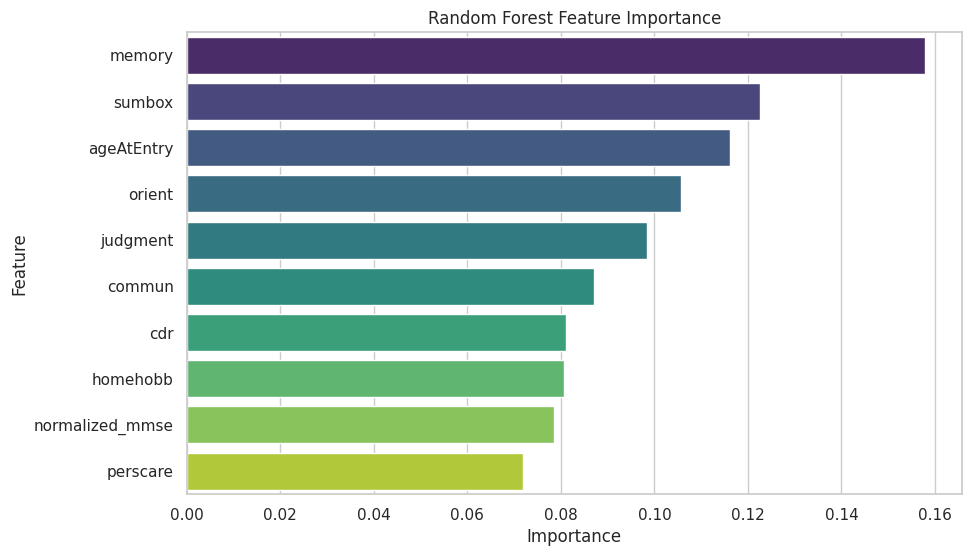

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create and fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


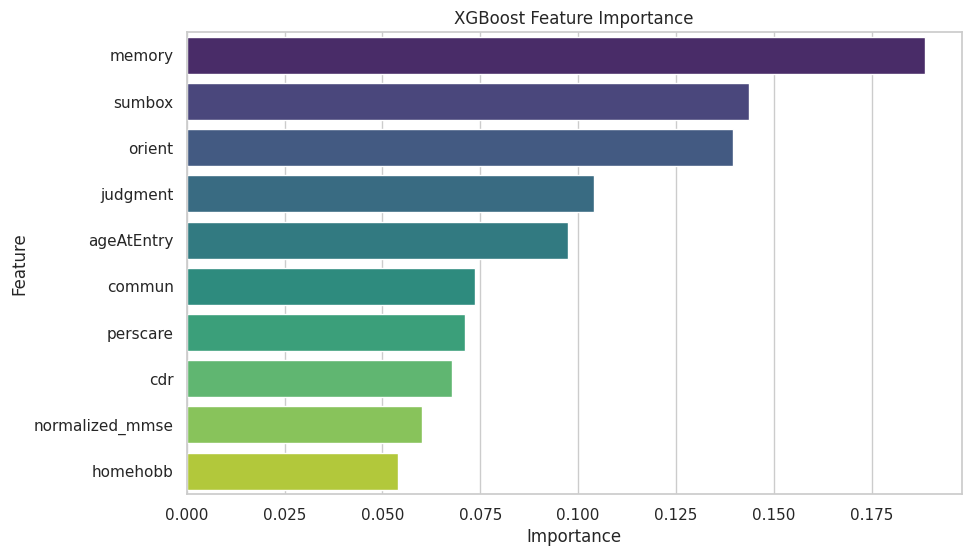

In [ ]:
from xgboost import XGBClassifier


# Create and fit an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X, y)

# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


# Bar Plot of Model Performance (Mean ROC AUC Scores):

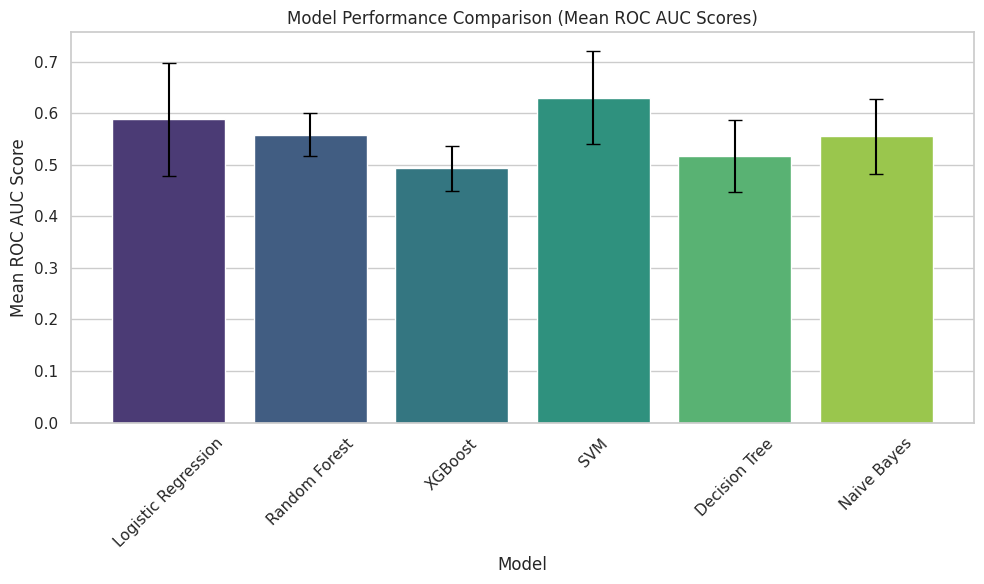

In [ ]:


# Define model names, mean ROC AUC scores, and standard deviations
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Decision Tree', 'Naive Bayes']
mean_roc_auc_scores = [0.5879, 0.5586, 0.4929, 0.6303, 0.5172, 0.5556]
std_devs = [0.1094, 0.0417, 0.0439, 0.0905, 0.0702, 0.0728]

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mean_roc_auc_scores, palette='viridis')
plt.errorbar(x=model_names, y=mean_roc_auc_scores, yerr=std_devs, fmt='none', c='black', capsize=5)
plt.xlabel('Model')
plt.ylabel('Mean ROC AUC Score')
plt.title('Model Performance Comparison (Mean ROC AUC Scores)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


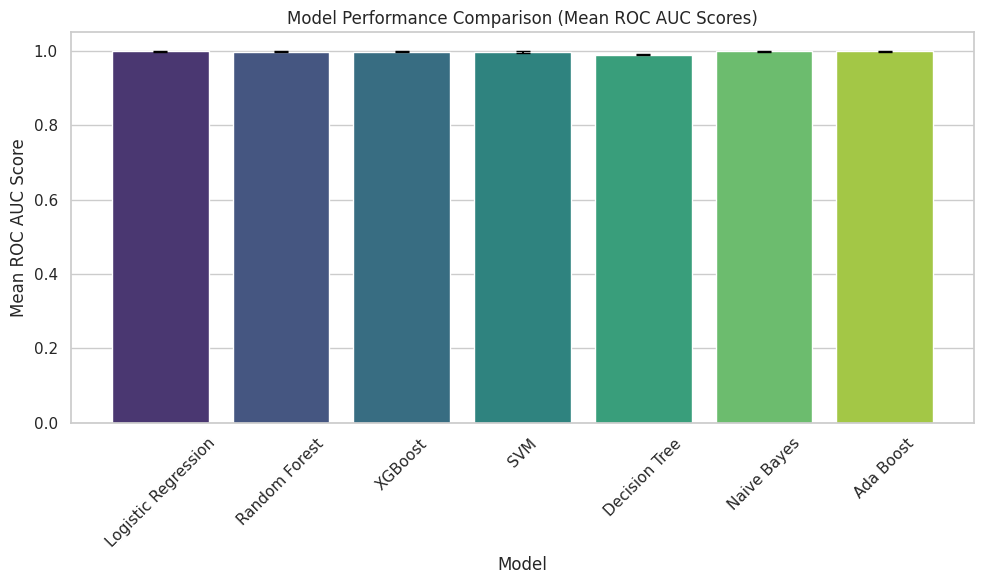

In [ ]:

# Define model names, mean ROC AUC scores, and standard deviations
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Decision Tree', 'Naive Bayes', 'Ada Boost']
mean_roc_auc_scores = [0.9986262783767039, 0.9979018657407768, 0.9980082003905032, 0.9974949948290843, 0.9898946994522719, 0.9984165073501432, 0.998276846802088]
std_devs = [0.0010197678067390785, 0.001237191200595214, 0.001270448095424254, 0.0020247585786516593, 0.001967950996344423, 0.0013497488186026215, 0.0011845398585735877]

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mean_roc_auc_scores, palette='viridis')
plt.errorbar(x=model_names, y=mean_roc_auc_scores, yerr=std_devs, fmt='none', c='black', capsize=5)
plt.xlabel('Model')
plt.ylabel('Mean ROC AUC Score')
plt.title('Model Performance Comparison (Mean ROC AUC Scores)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# bar plot comparing different evaluation metrics (accuracy, precision, recall, and F1-score) for each model:

# Detailed learning curve for best performing model:LR

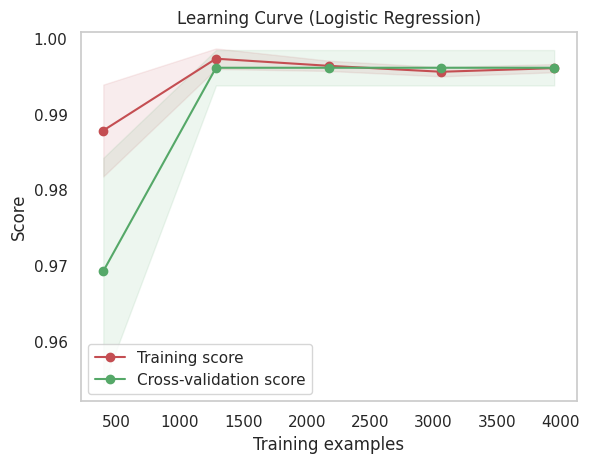

In [ ]:

from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

# Define your machine learning model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Create a function for plotting the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
        train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Load your preprocessed data and split into features (X) and target (y)
# X, y = ...

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scoring metric (e.g., accuracy, ROC AUC)
scoring_metric = make_scorer(accuracy_score)

# Create a learning curve plot
plot_learning_curve(LogisticRegression(), "Learning Curve (Logistic Regression)", X_train, y_train, cv=5, scoring=scoring_metric)

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
lr_model = LogisticRegression()

# Define the scoring metric you want to use, e.g., 'accuracy', 'roc_auc', etc.
scoring = 'accuracy'

# Perform k-fold cross-validation on the validation set and get the scores
# X_val and y_val are your validation set's feature and target variables
# cv is the number of cross-validation folds (e.g., cv=5 for 5-fold cross-validation)
cross_val_scores = cross_val_score(lr_model, X_val, y_val, cv=cv, scoring=scoring)


In [ ]:
cross_val_scores

array([0.99596774, 1.        , 1.        , 0.99595142, 0.99595142])